#Algoritmos de Ensemble Learning para Análise Preditiva acerca de Desastres Naturais

### Objetivos do Projeto:


*   Carregar a base de dados: informações gerais da base de dados original
*   Pré-processamento: limpeza, normalização e formatação dos dados
*   Exploração do dataset
*   Aplicação dos algoritmos: Separação em treino e teste, aplicar o algoritmo com aplicação e MSE por algoritmo,
*   Validação do Algoritmo









# Visão Geral do Dataset
A seguir, algumas informações gerais sobre os dados da base EM - DAT: The International Disaster Database, como número de colunas/atributos, algumas informações estatísticas e tipos de dados.



In [ ]:
# Acessando a base de dados salvos no google drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Utilizando as bibliotecas os e pandas para verificar os arquivos na pasta do drive

import os
import pandas as pd

# Caminho para a pasta no Drive
folder_path = '/content/drive/MyDrive/Colab Notebooks/datasetTrabFinal'

# Listar os arquivos na pasta
files = os.listdir(folder_path)
print(files)


['public_emdat_incl_hist_2024-07-15.xlsx', 'public_emdat_incl_hist_2024-07-15.csv']


In [ ]:
# Especificar o caminho para o arquivo Excel
excel_file = '/content/drive/MyDrive/Colab Notebooks/datasetTrabFinal/public_emdat_incl_hist_2024-07-15.xlsx'

# Ler o arquivo Excel
df_excel = pd.read_excel(excel_file)
#print(df_excel.head())

In [ ]:
# Convertendo o arquivo para .csv
csv_file = '/content/drive/MyDrive/Colab Notebooks/datasetTrabFinal/public_emdat_incl_hist_2024-07-15.csv'
df_excel.to_csv(csv_file, index=False)

# Lendo os arquivos .csv e mostrando as 5 primeiras linhas de algumas colunas
data = pd.read_csv(csv_file)
print(data.head())

          DisNo. Historic Classification Key Disaster Group  \
0  1900-0003-USA      Yes    nat-met-sto-tro        Natural   
1  1900-0005-USA      Yes    tec-ind-fir-fir  Technological   
2  1900-0006-JAM      Yes    nat-hyd-flo-flo        Natural   
3  1900-0007-JAM      Yes    nat-bio-epi-vir        Natural   
4  1900-0008-JPN      Yes    nat-geo-vol-ash        Natural   

     Disaster Subgroup      Disaster Type   Disaster Subtype External IDs  \
0       Meteorological              Storm   Tropical cyclone          NaN   
1  Industrial accident  Fire (Industrial)  Fire (Industrial)          NaN   
2         Hydrological              Flood    Flood (General)          NaN   
3           Biological           Epidemic      Viral disease          NaN   
4          Geophysical  Volcanic activity           Ash fall          NaN   

        Event Name  ISO  ... Reconstruction Costs ('000 US$)  \
0              NaN  USA  ...                             NaN   
1              NaN  USA  ...  

In [ ]:
# Mostrando todas as colunas do dataset
data.columns.values

array(['DisNo.', 'Historic', 'Classification Key', 'Disaster Group',
       'Disaster Subgroup', 'Disaster Type', 'Disaster Subtype',
       'External IDs', 'Event Name', 'ISO', 'Country', 'Subregion',
       'Region', 'Location', 'Origin', 'Associated Types',
       'OFDA/BHA Response', 'Appeal', 'Declaration',
       "AID Contribution ('000 US$)", 'Magnitude', 'Magnitude Scale',
       'Latitude', 'Longitude', 'River Basin', 'Start Year',
       'Start Month', 'Start Day', 'End Year', 'End Month', 'End Day',
       'Total Deaths', 'No. Injured', 'No. Affected', 'No. Homeless',
       'Total Affected', "Reconstruction Costs ('000 US$)",
       "Reconstruction Costs, Adjusted ('000 US$)",
       "Insured Damage ('000 US$)", "Insured Damage, Adjusted ('000 US$)",
       "Total Damage ('000 US$)", "Total Damage, Adjusted ('000 US$)",
       'CPI', 'Admin Units', 'Entry Date', 'Last Update'], dtype=object)

### Informações sobre o Dataset:
A base adquirida do EM - DAT: The International Disaster Database possui informações de desastres tanto naturais quanto tecnológicos (sendo apenas a primeira caterogia alvo deste estudo).
Antes da limpeza, a base possui 26632 entradas/linhas, 46 colunas/atributos e dados dos atributos tipo "objeto", float e inteiro. Note que há muitas colunas com poucos valores não nulos, como o "River Basin"  e "Reconstruction Costs ('000 US$").


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26632 entries, 0 to 26631
Data columns (total 46 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   DisNo.                                     26632 non-null  object 
 1   Historic                                   26632 non-null  object 
 2   Classification Key                         26632 non-null  object 
 3   Disaster Group                             26632 non-null  object 
 4   Disaster Subgroup                          26632 non-null  object 
 5   Disaster Type                              26632 non-null  object 
 6   Disaster Subtype                           26632 non-null  object 
 7   External IDs                               2419 non-null   object 
 8   Event Name                                 8352 non-null   object 
 9   ISO                                        26632 non-null  object 
 10  Country               

### Valores Nulos no Dataset:
Alguns atributos possuem poucos valores preenchidos no dataset, como os relacionados com custos de reconstrução, custo de danos totais e números de pessoas afetadas, sem lar e feridas, por exemplo.

In [ ]:
data.isna().sum()

,0
DisNo.,0
Historic,0
Classification Key,0
Disaster Group,0
Disaster Subgroup,0
Disaster Type,0
Disaster Subtype,0
External IDs,24213
Event Name,18280
ISO,0


# Pré-processamento dos Dados

### Limpeza dos Dados
Devido a grande dimensão da base e sua abrangência, algumas colunas e estradas serão desconsideradas para a aplicação do algoritmo, pois não apresentam informações relevantes para o tema do projeto, ou não são alvo do estudo de desastres naturais (por exemplo desastres tecnológicos ou biológicos). Em seguida, será feito o preenchimento ou eliminação de algumas linhas de colunas que estão vazias, de acordo com alguns critérios estabelecidos.

A limpeza começará pela eliminação de entradas que não são o alvo do estudo deste trabalho, como a entrada "Technological" do atributo Disaster Group.

In [ ]:
# Identificar os índices das linhas a serem removidas
remove_index = data[data['Disaster Group'] == 'Technological'].index

# Remover as linhas com esses índices
new_data = data.drop(remove_index)
print(new_data.head())

          DisNo. Historic Classification Key Disaster Group Disaster Subgroup  \
0  1900-0003-USA      Yes    nat-met-sto-tro        Natural    Meteorological   
2  1900-0006-JAM      Yes    nat-hyd-flo-flo        Natural      Hydrological   
3  1900-0007-JAM      Yes    nat-bio-epi-vir        Natural        Biological   
4  1900-0008-JPN      Yes    nat-geo-vol-ash        Natural       Geophysical   
5  1900-0009-TUR      Yes    nat-geo-ear-gro        Natural       Geophysical   

       Disaster Type  Disaster Subtype External IDs       Event Name  ISO  \
0              Storm  Tropical cyclone          NaN              NaN  USA   
2              Flood   Flood (General)          NaN              NaN  JAM   
3           Epidemic     Viral disease          NaN  Gastroenteritis  JAM   
4  Volcanic activity          Ash fall          NaN              NaN  JPN   
5         Earthquake   Ground movement          NaN              NaN  TUR   

   ... Reconstruction Costs ('000 US$)  \
0  ...  

In [ ]:
# Também serão removidas as entradas "Biological" e "Extra-terrestrial" do atributo Disaster Subgroup.

# Identificar os índices das linhas a serem removidas
remove_indices_subgroup = new_data[new_data['Disaster Subgroup'].isin(['Biological', 'Extra-terrestrial'])].index

# Remover as linhas com esses índices
new_df = new_data.drop(remove_indices_subgroup)
print(new_df.head())

          DisNo. Historic Classification Key Disaster Group Disaster Subgroup  \
0  1900-0003-USA      Yes    nat-met-sto-tro        Natural    Meteorological   
2  1900-0006-JAM      Yes    nat-hyd-flo-flo        Natural      Hydrological   
4  1900-0008-JPN      Yes    nat-geo-vol-ash        Natural       Geophysical   
5  1900-0009-TUR      Yes    nat-geo-ear-gro        Natural       Geophysical   
6  1900-9001-IND      Yes    nat-cli-dro-dro        Natural    Climatological   

       Disaster Type  Disaster Subtype External IDs Event Name  ISO  ...  \
0              Storm  Tropical cyclone          NaN        NaN  USA  ...   
2              Flood   Flood (General)          NaN        NaN  JAM  ...   
4  Volcanic activity          Ash fall          NaN        NaN  JPN  ...   
5         Earthquake   Ground movement          NaN        NaN  TUR  ...   
6            Drought           Drought          NaN        NaN  IND  ...   

  Reconstruction Costs ('000 US$) Reconstruction Costs, 

Com relação a eliminação de colunas, alguns fatores serão levados em consideração.

Primeiramente, serão excluídos as colunas com informações que apresentam pouca ou nenhuma relevancia para o estudo, além das colunas de dias e meses finais que não possuem tanto impacto nas análises fututras com relação a pariodicidade.

In [ ]:
# Remover as colunas especificadas
remove_colunas = ['DisNo.', 'External IDs', 'Classification Key', 'Event Name', 'River Basin', 'CPI', 'Admin Units', 'Reconstruction Costs (\'000 US$)', 'Insured Damage (\'000 US$)', 'Total Damage, Adjusted (\'000 US$)', 'Entry Date', 'Last Update', 'End Month', 'End Day', 'End Year']
df_novo = new_df.drop(columns=remove_colunas)

print(df_novo.head())



  Historic Disaster Group Disaster Subgroup      Disaster Type  \
0      Yes        Natural    Meteorological              Storm   
2      Yes        Natural      Hydrological              Flood   
4      Yes        Natural       Geophysical  Volcanic activity   
5      Yes        Natural       Geophysical         Earthquake   
6      Yes        Natural    Climatological            Drought   

   Disaster Subtype  ISO                   Country  \
0  Tropical cyclone  USA  United States of America   
2   Flood (General)  JAM                   Jamaica   
4          Ash fall  JPN                     Japan   
5   Ground movement  TUR                   Türkiye   
6           Drought  IND                     India   

                         Subregion    Region                      Location  \
0                 Northern America  Americas             Galveston (Texas)   
2  Latin America and the Caribbean  Americas                   Saint James   
4                     Eastern Asia      Asia

In [ ]:
# Quantidade de variáveis nulas no dataset novo com 15518 linhas
df_novo.isna().sum()

,0
Historic,0
Disaster Group,0
Disaster Subgroup,0
Disaster Type,0
Disaster Subtype,0
ISO,0
Country,0
Subregion,0
Region,0
Location,1538


Para o segundo critério de exclusão, seráo excluídas colunas com no mínimo 60% de dados nulos/faltantes (a partir de 9311 dados faltantes).

Total Damage será mantida por que é uma coluna de interese para o estudo.

In [ ]:
# Remover as colunas especificadas
remove_colunas = ['Origin', 'Associated Types', 'AID Contribution (\'000 US$)', 'Magnitude', 'Latitude', 'Longitude', 'No. Injured', 'No. Homeless', 'Reconstruction Costs, Adjusted (\'000 US$)', 'Insured Damage, Adjusted (\'000 US$)', 'ISO', 'Total Damage (\'000 US$)']
df_cleaned = df_novo.drop(columns=remove_colunas)

print(df_cleaned)


      Historic Disaster Group Disaster Subgroup      Disaster Type  \
0          Yes        Natural    Meteorological              Storm   
2          Yes        Natural      Hydrological              Flood   
4          Yes        Natural       Geophysical  Volcanic activity   
5          Yes        Natural       Geophysical         Earthquake   
6          Yes        Natural    Climatological            Drought   
...        ...            ...               ...                ...   
26627       No        Natural    Climatological            Drought   
26628       No        Natural    Climatological            Drought   
26629       No        Natural    Climatological            Drought   
26630       No        Natural    Climatological            Drought   
26631       No        Natural    Climatological            Drought   

       Disaster Subtype                   Country  \
0      Tropical cyclone  United States of America   
2       Flood (General)                   Jamaica   


In [ ]:
df_cleaned.isna().sum()

,0
Historic,0
Disaster Group,0
Disaster Subgroup,0
Disaster Type,0
Disaster Subtype,0
Country,0
Subregion,0
Region,0
Location,1538
OFDA/BHA Response,0


Como as únicas colunas que estão com menos de 10% de dados faltantes são Location e Magnitude Scale, essas linhas serão eliminadas.
As linhas com valores nulos de Total Deaths também serão eliminadas, pois é a variável alvo.
A linhas de Total Affected, Total Damage, No. Affected estão correlacionadas com Total Deaths, visto no gráfico de correlação abaixo, as linhas com valores nulos serão removidos.
As datas de entrada que estão com valores nulos também serão removidas.

In [ ]:
new_df_cleaned = df_cleaned.dropna(subset=['Location', 'Magnitude Scale', 'Total Deaths','No. Affected', 'Total Affected', 'Start Day', 'Start Month'])
print(new_df_cleaned)

      Historic Disaster Group Disaster Subgroup Disaster Type  \
18         Yes        Natural       Geophysical    Earthquake   
20         Yes        Natural       Geophysical    Earthquake   
26         Yes        Natural       Geophysical    Earthquake   
41         Yes        Natural       Geophysical    Earthquake   
50         Yes        Natural       Geophysical    Earthquake   
...        ...            ...               ...           ...   
26605       No        Natural      Hydrological         Flood   
26607       No        Natural    Meteorological         Storm   
26609       No        Natural    Meteorological         Storm   
26614       No        Natural    Climatological      Wildfire   
26618       No        Natural    Meteorological         Storm   

      Disaster Subtype                   Country  \
18     Ground movement              Soviet Union   
20     Ground movement              Soviet Union   
26     Ground movement                   Türkiye   
41     Grou

In [ ]:
new_df_cleaned.isna().sum()

,0
Historic,0
Disaster Group,0
Disaster Subgroup,0
Disaster Type,0
Disaster Subtype,0
Country,0
Subregion,0
Region,0
Location,0
OFDA/BHA Response,0


In [ ]:
new_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5032 entries, 18 to 26618
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Historic           5032 non-null   object 
 1   Disaster Group     5032 non-null   object 
 2   Disaster Subgroup  5032 non-null   object 
 3   Disaster Type      5032 non-null   object 
 4   Disaster Subtype   5032 non-null   object 
 5   Country            5032 non-null   object 
 6   Subregion          5032 non-null   object 
 7   Region             5032 non-null   object 
 8   Location           5032 non-null   object 
 9   OFDA/BHA Response  5032 non-null   object 
 10  Appeal             5032 non-null   object 
 11  Declaration        5032 non-null   object 
 12  Magnitude Scale    5032 non-null   object 
 13  Start Year         5032 non-null   int64  
 14  Start Month        5032 non-null   float64
 15  Start Day          5032 non-null   float64
 16  Total Deaths       5032 non

In [ ]:
# A coluna Total Deaths, No. Affected e Total Affected que estão descrita como float não possui valores contínuos, portanto serão convertidos para inteiro.

converter_colunas = ['Total Deaths', 'No. Affected', 'Total Affected', 'Start Day', 'Start Year', 'Start Month']
new_df_cleaned[converter_colunas] = new_df_cleaned[converter_colunas].astype(int)
new_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5032 entries, 18 to 26618
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Historic           5032 non-null   object
 1   Disaster Group     5032 non-null   object
 2   Disaster Subgroup  5032 non-null   object
 3   Disaster Type      5032 non-null   object
 4   Disaster Subtype   5032 non-null   object
 5   Country            5032 non-null   object
 6   Subregion          5032 non-null   object
 7   Region             5032 non-null   object
 8   Location           5032 non-null   object
 9   OFDA/BHA Response  5032 non-null   object
 10  Appeal             5032 non-null   object
 11  Declaration        5032 non-null   object
 12  Magnitude Scale    5032 non-null   object
 13  Start Year         5032 non-null   int64 
 14  Start Month        5032 non-null   int64 
 15  Start Day          5032 non-null   int64 
 16  Total Deaths       5032 non-null   int64 
 17

<ipython-input-22-f9e27a34bd95>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df_cleaned[converter_colunas] = new_df_cleaned[converter_colunas].astype(int)


In [ ]:
# Convertendo as datas para formato datetime do pandas
new_df_cleaned['Date'] = pd.to_datetime(new_df_cleaned['Start Year'].astype(str) + '-' + new_df_cleaned['Start Month'].astype(str) + '-' + new_df_cleaned['Start Day'].astype(str), format='%Y-%m-%d')

# Removendo as colunas originais 'Start Year', 'Start Month' e 'Start Day'
new_df_cleaned.drop(['Start Year', 'Start Month', 'Start Day'], axis=1, inplace=True)

# Mostrar o DataFrame
print(new_df_cleaned)

KeyError: 'Start Year'

#Análise Exploratória do Dataset

In [ ]:
new_df_cleaned[['Total Deaths', 'No. Affected', 'Total Affected']].describe()

,Total Deaths,No. Affected,Total Affected
count,5032.000000,5.032000e+03,5.032000e+03
mean,445.211049,9.002060e+05,9.192044e+05
std,6774.084640,7.420713e+06,7.581104e+06
min,1.000000,5.000000e+00,5.000000e+00
25%,4.000000,2.838750e+03,3.000000e+03
50%,12.000000,2.000000e+04,2.027450e+04
75%,45.000000,1.497200e+05,1.537552e+05
max,300000.000000,2.230000e+08,2.389730e+08


In [ ]:
print(new_df_cleaned['Region'].unique(), "\n")

print(new_df_cleaned['Subregion'].unique(), "\n")

print(new_df_cleaned['Disaster Subgroup'].unique(), "\n")

print(new_df_cleaned['Disaster Type'].unique(), "\n")

print(new_df_cleaned['Disaster Subtype'].unique(), "\n")

['Europe' 'Asia' 'Americas' 'Oceania' 'Africa'] 

['Eastern Europe' 'Western Asia' 'Southern Europe' 'Eastern Asia'
 'Latin America and the Caribbean' 'Southern Asia'
 'Australia and New Zealand' 'South-eastern Asia' 'Northern America'
 'Western Europe' 'Polynesia' 'Melanesia' 'Sub-Saharan Africa'
 'Northern Africa' 'Northern Europe' 'Micronesia' 'Central Asia'] 

['Geophysical' 'Meteorological' 'Hydrological' 'Climatological'] 

['Earthquake' 'Storm' 'Flood' 'Wildfire' 'Extreme temperature' 'Drought'] 

['Ground movement' 'Tropical cyclone' 'Riverine flood' 'Flood (General)'
 'Coastal flood' 'Tsunami' 'Storm (General)' 'Flash flood' 'Tornado'
 'Land fire (Brush, Bush, Pasture)' 'Forest fire' 'Severe weather' 'Hail'
 'Cold wave' 'Heat wave' 'Blizzard/Winter storm' 'Lightning/Thunderstorms'
 'Sand/Dust storm' 'Extra-tropical storm' 'Severe winter conditions'
 'Drought' 'Wildfire (General)' 'Storm surge' 'Derecho'] 



In [ ]:
def get_subtypes_by_disaster_type(disaster_type):
    return new_df_cleaned[new_df_cleaned['Disaster Type'] == disaster_type]['Disaster Subtype'].unique()

print(f"Subtipos relacionados com 'Storm':\n{get_subtypes_by_disaster_type('Storm')}")
print(f"\nSubtipos relacionados com 'Earthquake':\n{get_subtypes_by_disaster_type('Earthquake')}")
print(f"\nSubtipos relacionados com 'Flood':\n{get_subtypes_by_disaster_type('Flood')}")
print(f"\nSubtipos relacionados com 'Wildfire':\n{get_subtypes_by_disaster_type('Wildfire')}")
print(f"\nSubtipos relacionados com 'Extreme temperature':\n{get_subtypes_by_disaster_type('Extreme temperature')}")
print(f"\nSubtipos relacionados com 'Drought':\n{get_subtypes_by_disaster_type('Drought')}")

Subtipos relacionados com 'Storm':
['Tropical cyclone' 'Storm (General)' 'Tornado' 'Severe weather' 'Hail'
 'Blizzard/Winter storm' 'Lightning/Thunderstorms' 'Sand/Dust storm'
 'Extra-tropical storm' 'Storm surge' 'Derecho']

Subtipos relacionados com 'Earthquake':
['Ground movement' 'Tsunami']

Subtipos relacionados com 'Flood':
['Riverine flood' 'Flood (General)' 'Coastal flood' 'Flash flood']

Subtipos relacionados com 'Wildfire':
['Land fire (Brush, Bush, Pasture)' 'Forest fire' 'Wildfire (General)']

Subtipos relacionados com 'Extreme temperature':
['Cold wave' 'Heat wave' 'Severe winter conditions']

Subtipos relacionados com 'Drought':
['Drought']


###Entendendo a Distribuição de 'Total Deaths'

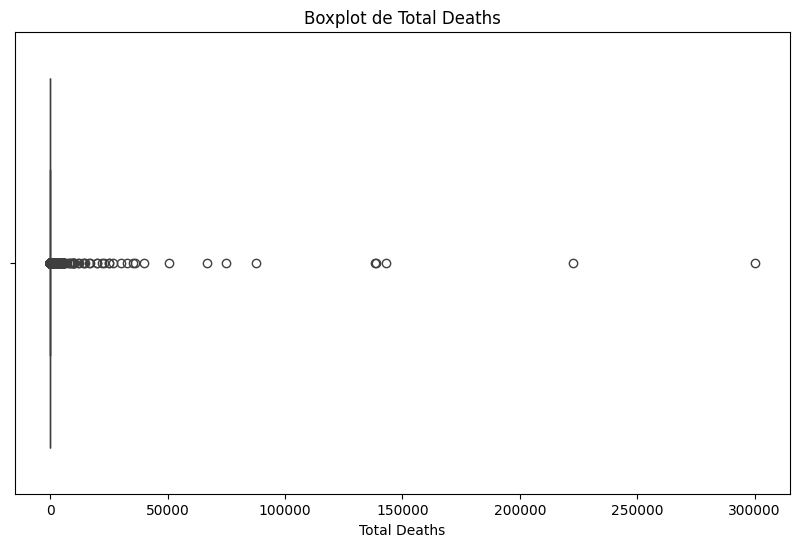

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot para detectar outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=new_df_cleaned['Total Deaths'])
plt.title('Boxplot de Total Deaths')
plt.xlabel('Total Deaths')
plt.show()

####Distribuição de Total Deaths pelo desastre tipo 'Flood'


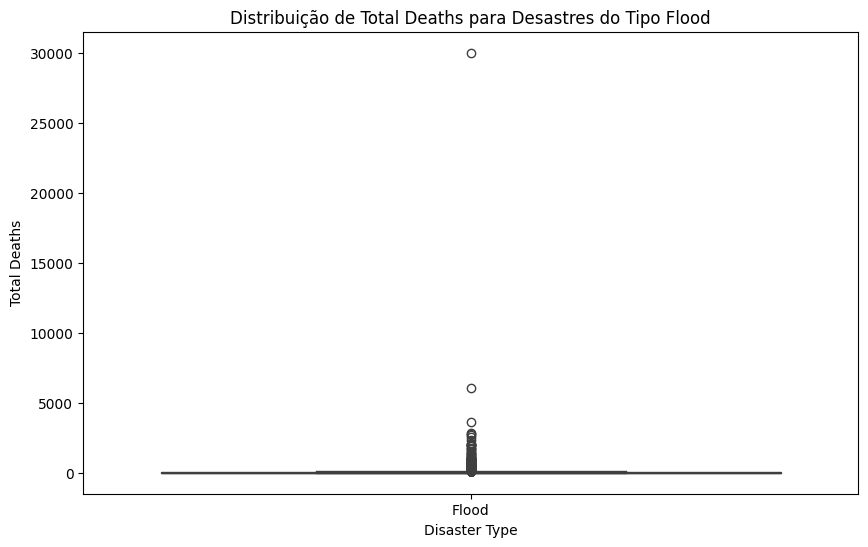

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar os dados para desastres do tipo 'Flood'
flood_data = new_df_cleaned[new_df_cleaned['Disaster Type'] == 'Flood']

# Configurar o tamanho do gráfico
plt.figure(figsize=(10, 6))

# Criar o box plot para 'Total Deaths' nos desastres do tipo 'Flood'
sns.boxplot(data=flood_data, x='Disaster Type', y='Total Deaths')

# Título e rótulos dos eixos
plt.title('Distribuição de Total Deaths para Desastres do Tipo Flood')
plt.xlabel('Disaster Type')
plt.ylabel('Total Deaths')

# Mostrar o gráfico
plt.show()

###Boxplot da distribuição Total Deaths por desastre do tipo 'Flood' para cada subcontinente

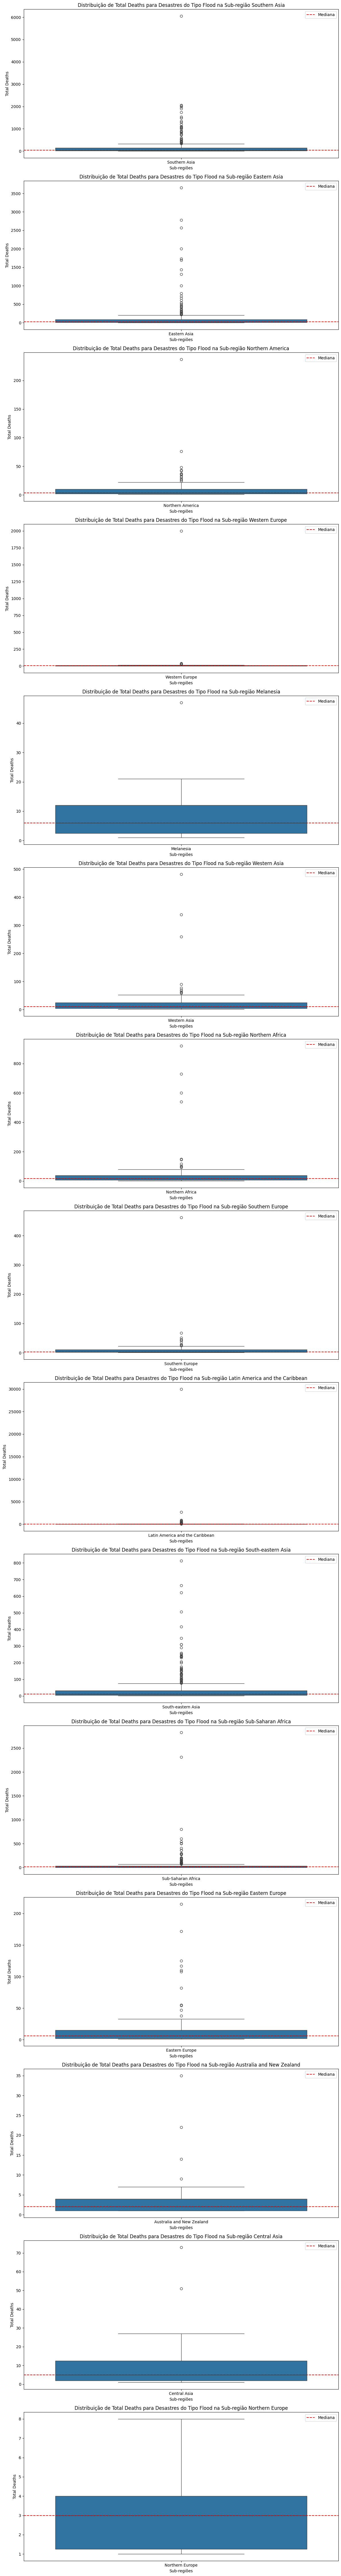

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar os dados para desastres do tipo 'Flood'
bp_data = new_df_cleaned[new_df_cleaned['Disaster Type'] == 'Flood']

# Obter as sub-regiões únicas
subregions = bp_data['Subregion'].unique()

# Configurar o tamanho do gráfico e o número de subplots
num_subregions = len(subregions)
plt.figure(figsize=(12, 6 * num_subregions))  # Ajustar o tamanho do gráfico para acomodar todos os subplots

# Criar um box plot para cada sub-região
for i, subregion in enumerate(subregions):
    # Filtrar dados para a sub-região específica
    subregion_data = bp_data[bp_data['Subregion'] == subregion]

    # Criar um subplot
    plt.subplot(num_subregions, 1, i + 1)  # (linhas, colunas, índice do subplot)

    # Criar o box plot
    sns.boxplot(data=subregion_data, x='Subregion', y='Total Deaths')

    # Adicionar título e rótulos dos eixos
    plt.title(f'Distribuição de Total Deaths para Desastres do Tipo Flood na Sub-região {subregion}')
    plt.xlabel('Sub-regiões')  # Mesmo rótulo para todas as sub-regiões
    plt.ylabel('Total Deaths')

    # Adicionar uma linha horizontal no gráfico para clareza (opcional)
    plt.axhline(y=subregion_data['Total Deaths'].median(), color='r', linestyle='--', label='Mediana')
    plt.legend(loc='upper right')

# Ajustar layout para evitar sobreposição de textos
plt.tight_layout()

# Mostrar o gráfico
plt.show()


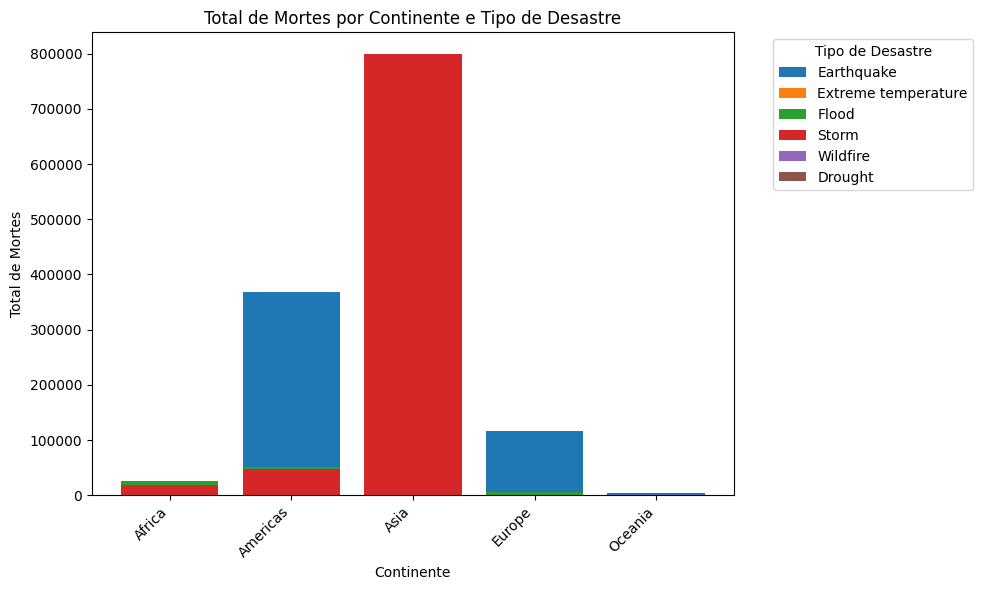

In [ ]:
import matplotlib.pyplot as plt
# Agrupar os dados por 'Region' e 'Disaster Type', e somar as mortes
grouped_data = new_df_cleaned.groupby(['Region', 'Disaster Type'])['Total Deaths'].sum().reset_index()

# Criar o histograma
plt.figure(figsize=(10, 6))

for disaster_type in grouped_data['Disaster Type'].unique():
    subset = grouped_data[grouped_data['Disaster Type'] == disaster_type]
    plt.bar(subset['Region'], subset['Total Deaths'], label=disaster_type)

plt.title('Total de Mortes por Continente e Tipo de Desastre')
plt.xlabel('Continente')
plt.ylabel('Total de Mortes')
plt.legend(title='Tipo de Desastre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


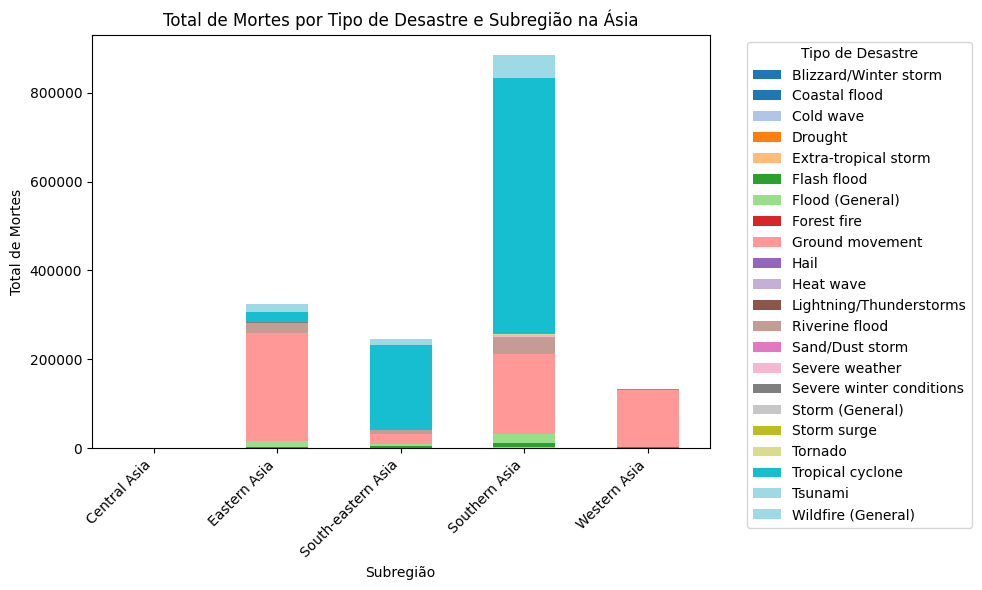

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Filtrar os dados para o continente 'Asia'
asia_data = new_df_cleaned[new_df_cleaned['Region'] == 'Asia']

# Agrupar os dados por 'Subregion' e 'Disaster Subtype', e somar as mortes
grouped_data = asia_data.groupby(['Subregion', 'Disaster Subtype'])['Total Deaths'].sum().unstack()

# Criar o gráfico
plt.figure(figsize=(10, 6))

# Plotar as barras empilhadas
grouped_data.plot(kind='bar', stacked=True, colormap='tab20', ax=plt.gca())

plt.title('Total de Mortes por Tipo de Desastre e Subregião na Ásia')
plt.xlabel('Subregião')
plt.ylabel('Total de Mortes')
plt.legend(title='Tipo de Desastre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



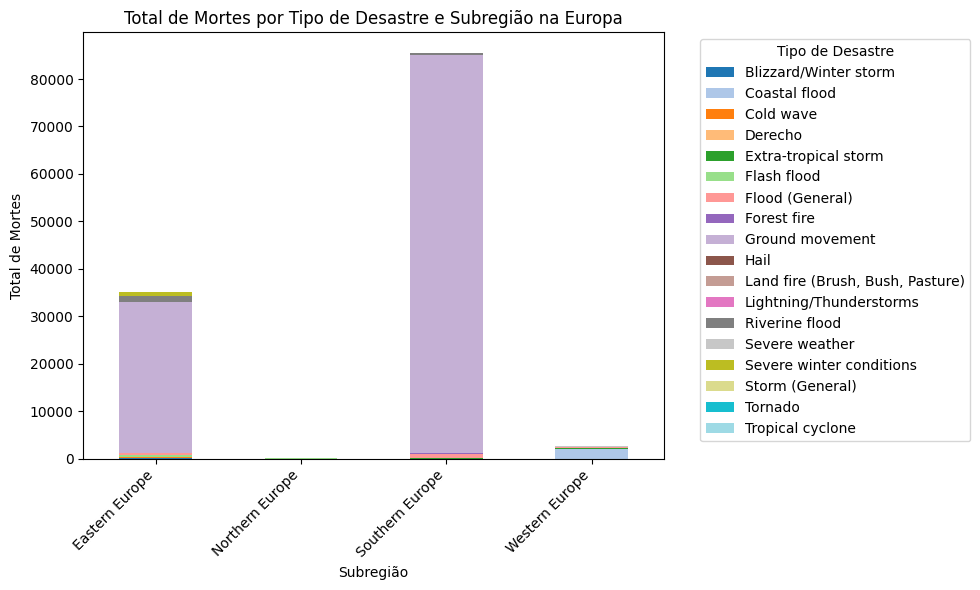

In [ ]:
# Filtrar os dados para o continente 'Europe'
europe_data = new_df_cleaned[new_df_cleaned['Region'] == 'Europe']

# Agrupar os dados por 'Subregion' e 'Disaster Subtype', e somar as mortes
grouped_data = europe_data.groupby(['Subregion', 'Disaster Subtype'])['Total Deaths'].sum().unstack()

# Criar o gráfico
plt.figure(figsize=(10, 6))

# Plotar as barras empilhadas
grouped_data.plot(kind='bar', stacked=True, colormap='tab20', ax=plt.gca())

plt.title('Total de Mortes por Tipo de Desastre e Subregião na Europa')
plt.xlabel('Subregião')
plt.ylabel('Total de Mortes')
plt.legend(title='Tipo de Desastre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


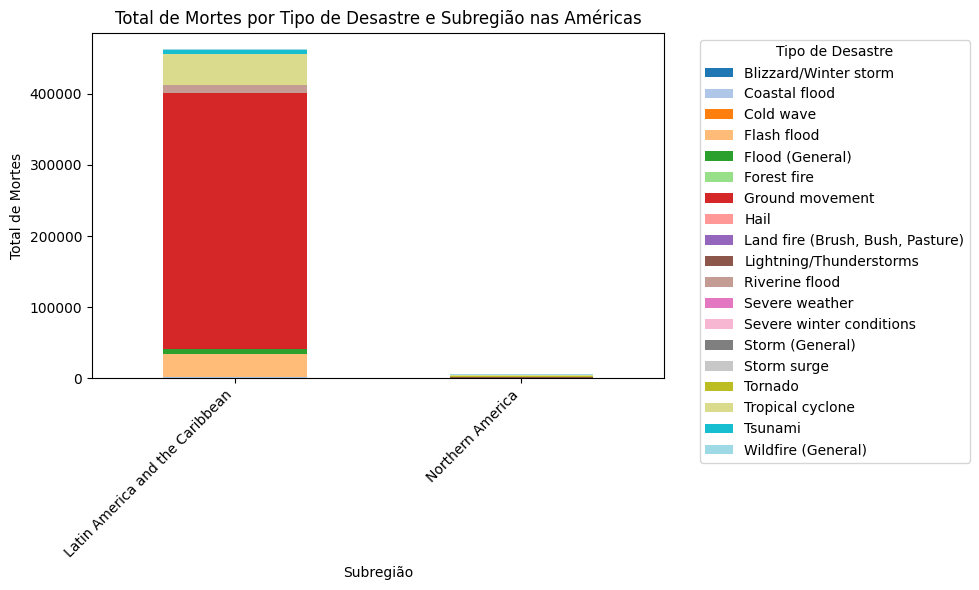

In [ ]:
# Filtrar os dados para o continente 'Americas'
americas_data = new_df_cleaned[new_df_cleaned['Region'] == 'Americas']

# Agrupar os dados por 'Subregion' e 'Disaster Subtype', e somar as mortes
grouped_data = americas_data.groupby(['Subregion', 'Disaster Subtype'])['Total Deaths'].sum().unstack()

# Criar o gráfico
plt.figure(figsize=(10, 6))

# Plotar as barras empilhadas
grouped_data.plot(kind='bar', stacked=True, colormap='tab20', ax=plt.gca())

plt.title('Total de Mortes por Tipo de Desastre e Subregião nas Américas')
plt.xlabel('Subregião')
plt.ylabel('Total de Mortes')
plt.legend(title='Tipo de Desastre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

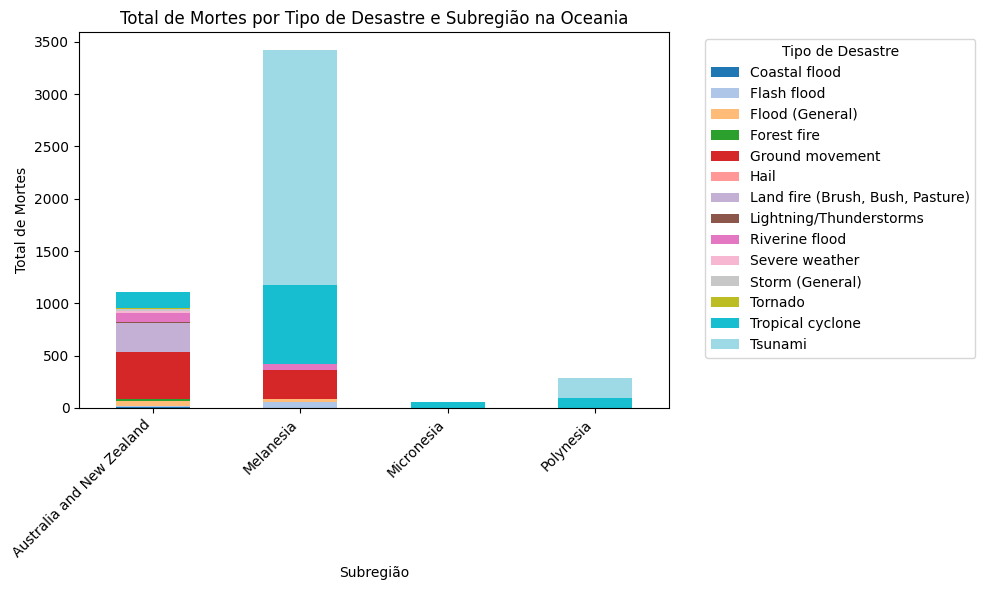

In [ ]:
# Filtrar os dados para o continente 'Oceania'
oceania_data = new_df_cleaned[new_df_cleaned['Region'] == 'Oceania']

# Agrupar os dados por 'Subregion' e 'Disaster Subtype', e somar as mortes
grouped_data = oceania_data.groupby(['Subregion', 'Disaster Subtype'])['Total Deaths'].sum().unstack()

# Criar o gráfico
plt.figure(figsize=(10, 6))

# Plotar as barras empilhadas
grouped_data.plot(kind='bar', stacked=True, colormap='tab20', ax=plt.gca())

plt.title('Total de Mortes por Tipo de Desastre e Subregião na Oceania')
plt.xlabel('Subregião')
plt.ylabel('Total de Mortes')
plt.legend(title='Tipo de Desastre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

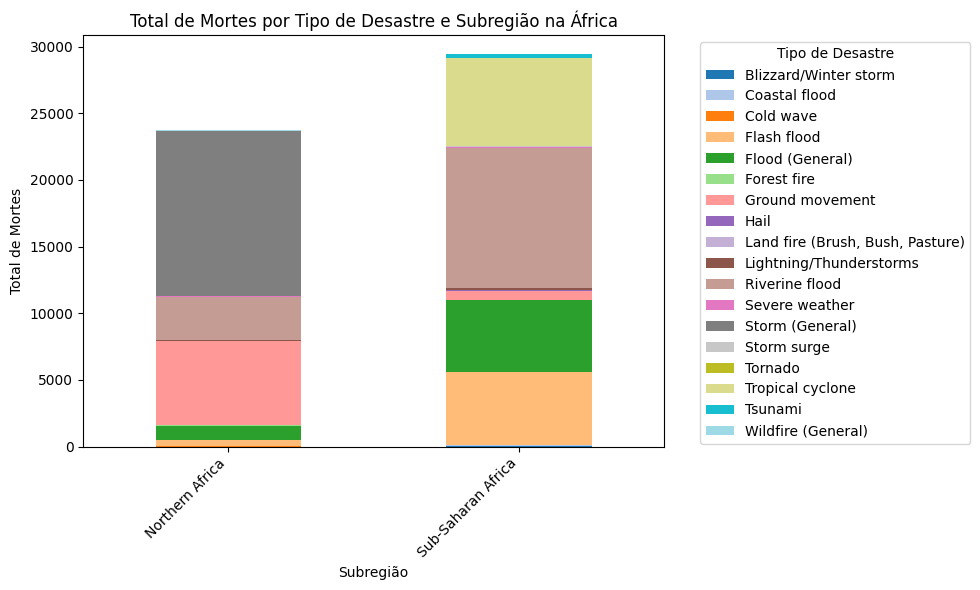

In [ ]:
# Filtrar os dados para o continente 'Africa'
africa_data = new_df_cleaned[new_df_cleaned['Region'] == 'Africa']

# Agrupar os dados por 'Subregion' e 'Disaster Subtype', e somar as mortes
grouped_data = africa_data.groupby(['Subregion', 'Disaster Subtype'])['Total Deaths'].sum().unstack()

# Criar o gráfico
plt.figure(figsize=(10, 6))

# Plotar as barras empilhadas
grouped_data.plot(kind='bar', stacked=True, colormap='tab20', ax=plt.gca())

plt.title('Total de Mortes por Tipo de Desastre e Subregião na África')
plt.xlabel('Subregião')
plt.ylabel('Total de Mortes')
plt.legend(title='Tipo de Desastre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<ipython-input-36-4de031e365d2>:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(disaster_types))


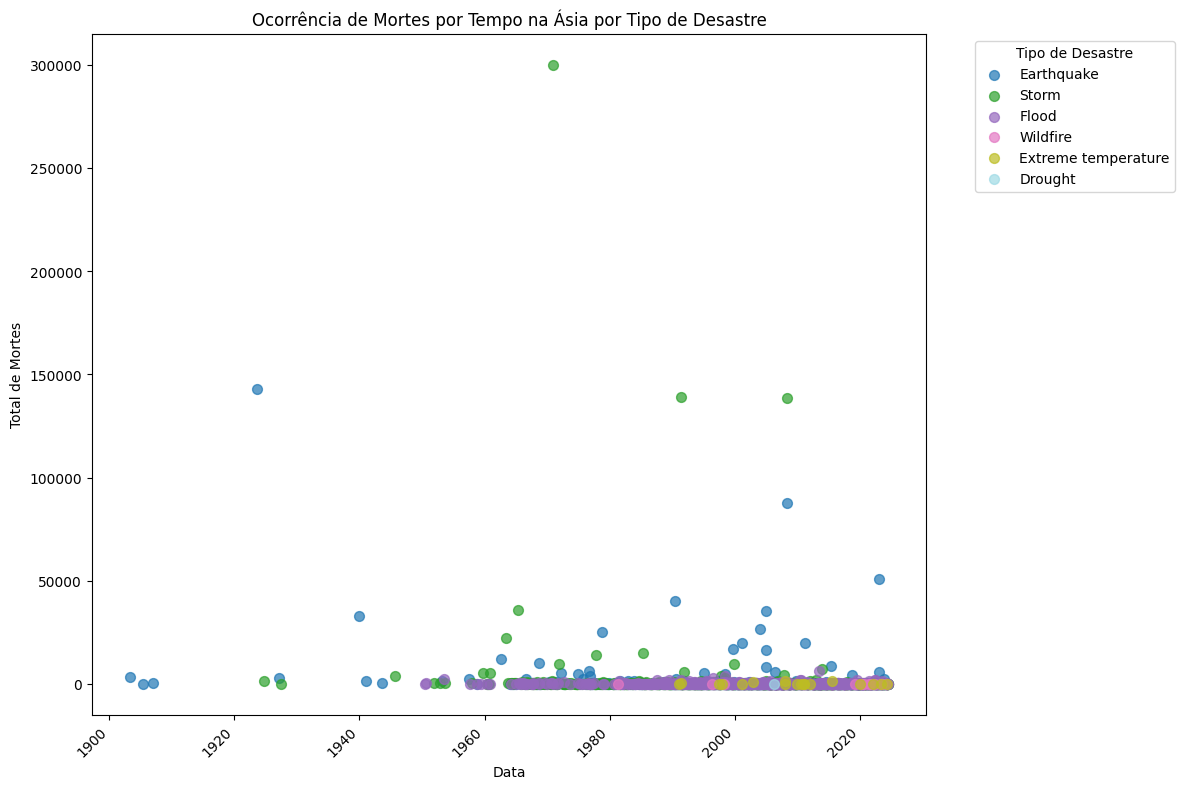

In [ ]:
# Filtrar os dados para o continente 'Asia'
asia_data = new_df_cleaned[new_df_cleaned['Region'] == 'Asia']

# Criar uma lista de cores para os tipos de desastre
disaster_types = asia_data['Disaster Type'].unique()
colors = plt.cm.get_cmap('tab20', len(disaster_types))

# Mapeamento dos tipos de desastre para cores
color_map = {dtype: colors(i) for i, dtype in enumerate(disaster_types)}

# Criar o gráfico de dispersão
plt.figure(figsize=(12, 8))

# Plotar as bolinhas coloridas para diferentes tipos de desastres
for disaster_type, color in color_map.items():
    subset = asia_data[asia_data['Disaster Type'] == disaster_type]
    plt.scatter(
        subset['Date'],
        subset['Total Deaths'],
        color=color,
        label=disaster_type,
        s=50, # Tamanho das bolinhas
        alpha=0.7 # Transparência das bolinhas
    )

# Adicionar legendas
plt.legend(title='Tipo de Desastre', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('Ocorrência de Mortes por Tempo na Ásia por Tipo de Desastre')
plt.xlabel('Data')
plt.ylabel('Total de Mortes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<ipython-input-37-fac2ccacb058>:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(disaster_types))


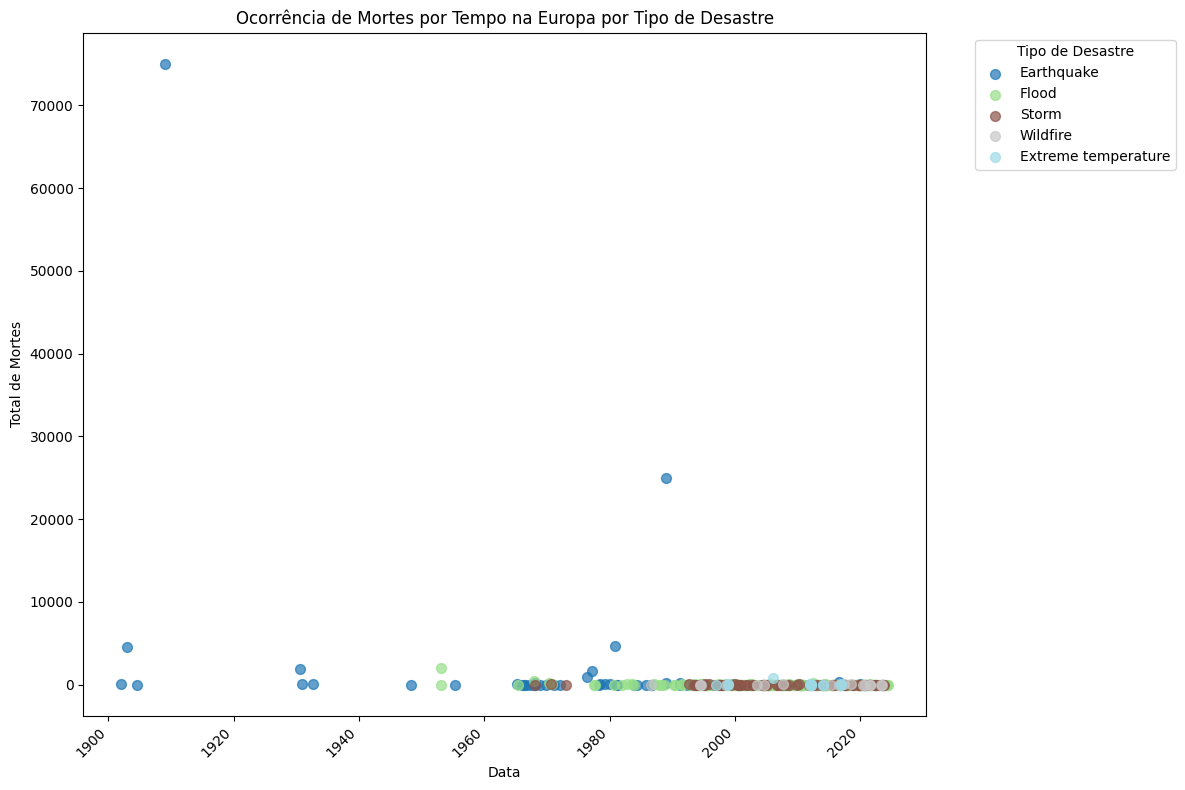

In [ ]:
# Filtrar os dados para o continente 'Europe'
europe_data = new_df_cleaned[new_df_cleaned['Region'] == 'Europe']

# Criar uma lista de cores para os tipos de desastre
disaster_types = europe_data['Disaster Type'].unique()
colors = plt.cm.get_cmap('tab20', len(disaster_types))

# Mapeamento dos tipos de desastre para cores
color_map = {dtype: colors(i) for i, dtype in enumerate(disaster_types)}

# Criar o gráfico de dispersão
plt.figure(figsize=(12, 8))

# Plotar as bolinhas coloridas para diferentes tipos de desastres
for disaster_type, color in color_map.items():
    subset = europe_data[europe_data['Disaster Type'] == disaster_type]
    plt.scatter(
        subset['Date'],
        subset['Total Deaths'],
        color=color,
        label=disaster_type,
        s=50, # Tamanho das bolinhas
        alpha=0.7 # Transparência das bolinhas
    )

# Adicionar legendas
plt.legend(title='Tipo de Desastre', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('Ocorrência de Mortes por Tempo na Europa por Tipo de Desastre')
plt.xlabel('Data')
plt.ylabel('Total de Mortes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<ipython-input-38-a413b84e476f>:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(disaster_types))


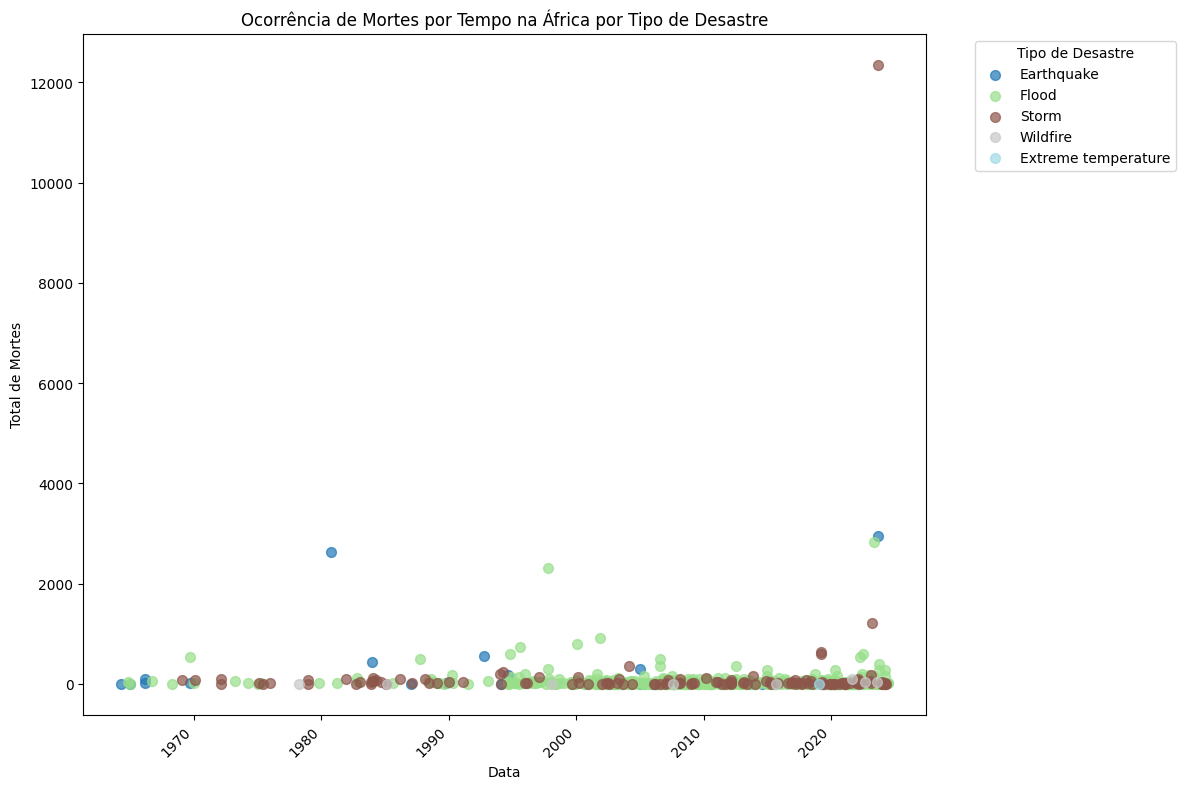

In [ ]:
# Filtrar os dados para o continente 'Africa'
africa_data = new_df_cleaned[new_df_cleaned['Region'] == 'Africa']

# Criar uma lista de cores para os tipos de desastre
disaster_types = africa_data['Disaster Type'].unique()
colors = plt.cm.get_cmap('tab20', len(disaster_types))

# Mapeamento dos tipos de desastre para cores
color_map = {dtype: colors(i) for i, dtype in enumerate(disaster_types)}

# Criar o gráfico de dispersão
plt.figure(figsize=(12, 8))

# Plotar as bolinhas coloridas para diferentes tipos de desastres
for disaster_type, color in color_map.items():
    subset = africa_data[africa_data['Disaster Type'] == disaster_type]
    plt.scatter(
        subset['Date'],
        subset['Total Deaths'],
        color=color,
        label=disaster_type,
        s=50, # Tamanho das bolinhas
        alpha=0.7 # Transparência das bolinhas
    )

# Adicionar legendas
plt.legend(title='Tipo de Desastre', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('Ocorrência de Mortes por Tempo na África por Tipo de Desastre')
plt.xlabel('Data')
plt.ylabel('Total de Mortes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<ipython-input-39-7016e39a9bf8>:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(disaster_types))


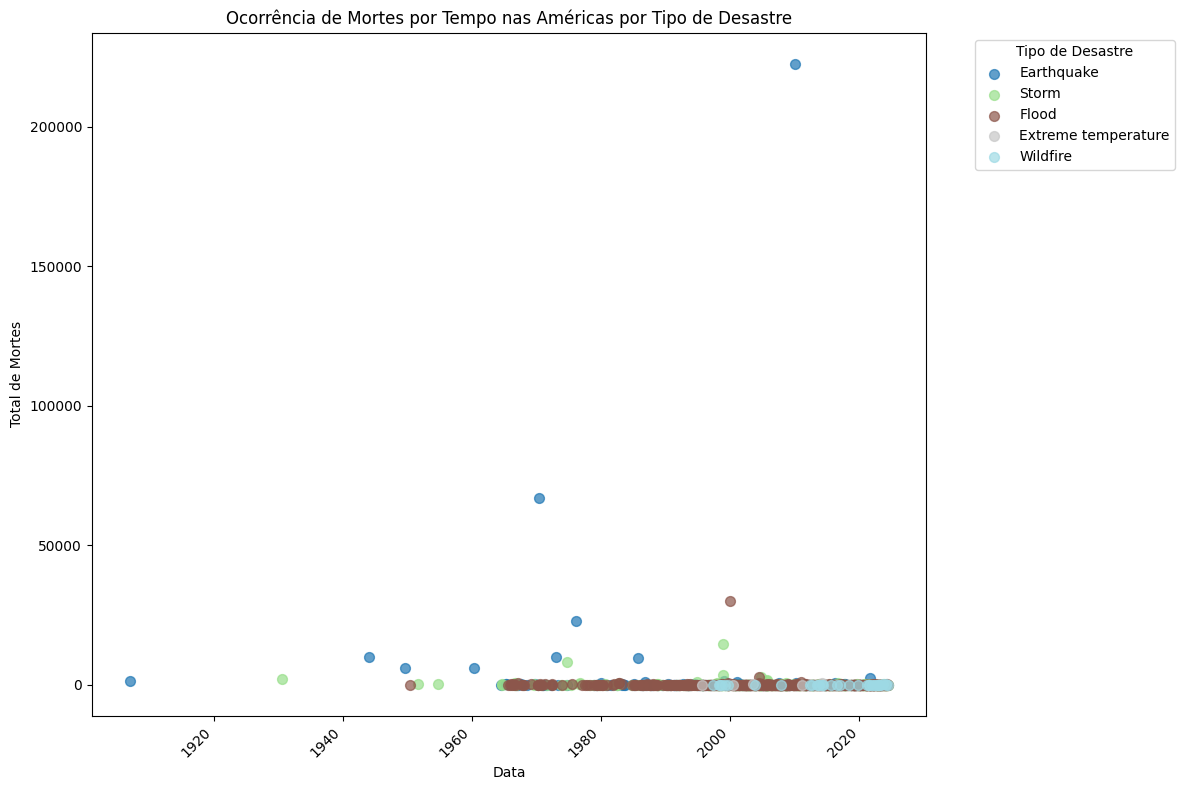

In [ ]:
# Filtrar os dados para o continente 'America'
america_data = new_df_cleaned[new_df_cleaned['Region'] == 'Americas']

# Criar uma lista de cores para os tipos de desastre
disaster_types = america_data['Disaster Type'].unique()
colors = plt.cm.get_cmap('tab20', len(disaster_types))

# Mapeamento dos tipos de desastre para cores
color_map = {dtype: colors(i) for i, dtype in enumerate(disaster_types)}

# Criar o gráfico de dispersão
plt.figure(figsize=(12, 8))

# Plotar as bolinhas coloridas para diferentes tipos de desastres
for disaster_type, color in color_map.items():
    subset = america_data[america_data['Disaster Type'] == disaster_type]
    plt.scatter(
        subset['Date'],
        subset['Total Deaths'],
        color=color,
        label=disaster_type,
        s=50, # Tamanho das bolinhas
        alpha=0.7 # Transparência das bolinhas
    )

# Adicionar legendas
plt.legend(title='Tipo de Desastre', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('Ocorrência de Mortes por Tempo nas Américas por Tipo de Desastre')
plt.xlabel('Data')
plt.ylabel('Total de Mortes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<ipython-input-40-a32c6e87300c>:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(disaster_types))


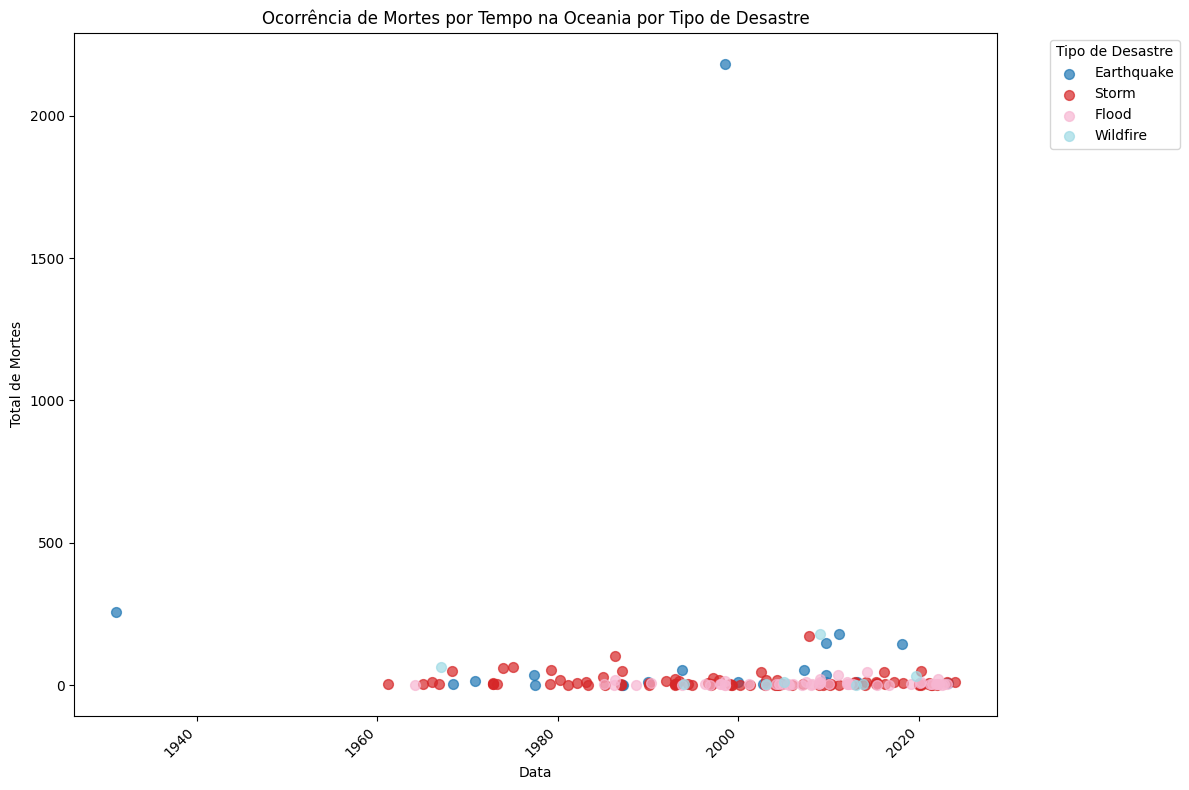

In [ ]:
# Filtrar os dados para o continente 'Oceania'
oceania_data = new_df_cleaned[new_df_cleaned['Region'] == 'Oceania']

# Criar uma lista de cores para os tipos de desastre
disaster_types = oceania_data['Disaster Type'].unique()
colors = plt.cm.get_cmap('tab20', len(disaster_types))

# Mapeamento dos tipos de desastre para cores
color_map = {dtype: colors(i) for i, dtype in enumerate(disaster_types)}

# Criar o gráfico de dispersão
plt.figure(figsize=(12, 8))

# Plotar as bolinhas coloridas para diferentes tipos de desastres
for disaster_type, color in color_map.items():
    subset = oceania_data[oceania_data['Disaster Type'] == disaster_type]
    plt.scatter(
        subset['Date'],
        subset['Total Deaths'],
        color=color,
        label=disaster_type,
        s=50, # Tamanho das bolinhas
        alpha=0.7 # Transparência das bolinhas
    )

# Adicionar legendas
plt.legend(title='Tipo de Desastre', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('Ocorrência de Mortes por Tempo na Oceania por Tipo de Desastre')
plt.xlabel('Data')
plt.ylabel('Total de Mortes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


<ipython-input-41-7d16e2655949>:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(disaster_types))


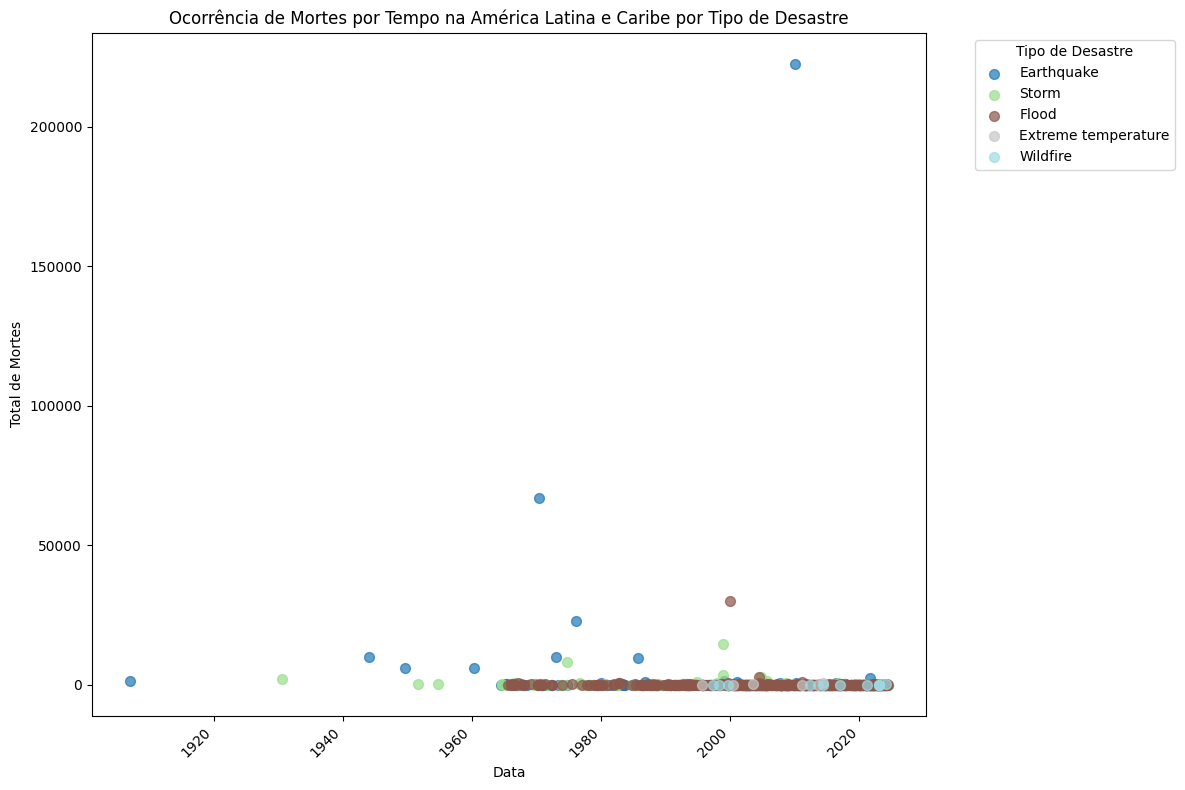

In [ ]:
# Filtrar os dados para o subcontinente 'Latin America and the Caribbean'
latin_america_data = new_df_cleaned[new_df_cleaned['Subregion'] == 'Latin America and the Caribbean']

# Criar uma lista de cores para os tipos de desastre
disaster_types = latin_america_data['Disaster Type'].unique()
colors = plt.cm.get_cmap('tab20', len(disaster_types))

# Mapeamento dos tipos de desastre para cores
color_map = {dtype: colors(i) for i, dtype in enumerate(disaster_types)}

# Criar o gráfico de dispersão
plt.figure(figsize=(12, 8))

# Plotar as bolinhas coloridas para diferentes tipos de desastres
for disaster_type, color in color_map.items():
    subset = latin_america_data[latin_america_data['Disaster Type'] == disaster_type]
    plt.scatter(
        subset['Date'],
        subset['Total Deaths'],
        color=color,
        label=disaster_type,
        s=50, # Tamanho das bolinhas
        alpha=0.7 # Transparência das bolinhas
    )

# Adicionar legendas
plt.legend(title='Tipo de Desastre', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('Ocorrência de Mortes por Tempo na América Latina e Caribe por Tipo de Desastre')
plt.xlabel('Data')
plt.ylabel('Total de Mortes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


<ipython-input-42-71b0bbe78126>:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(disaster_types))


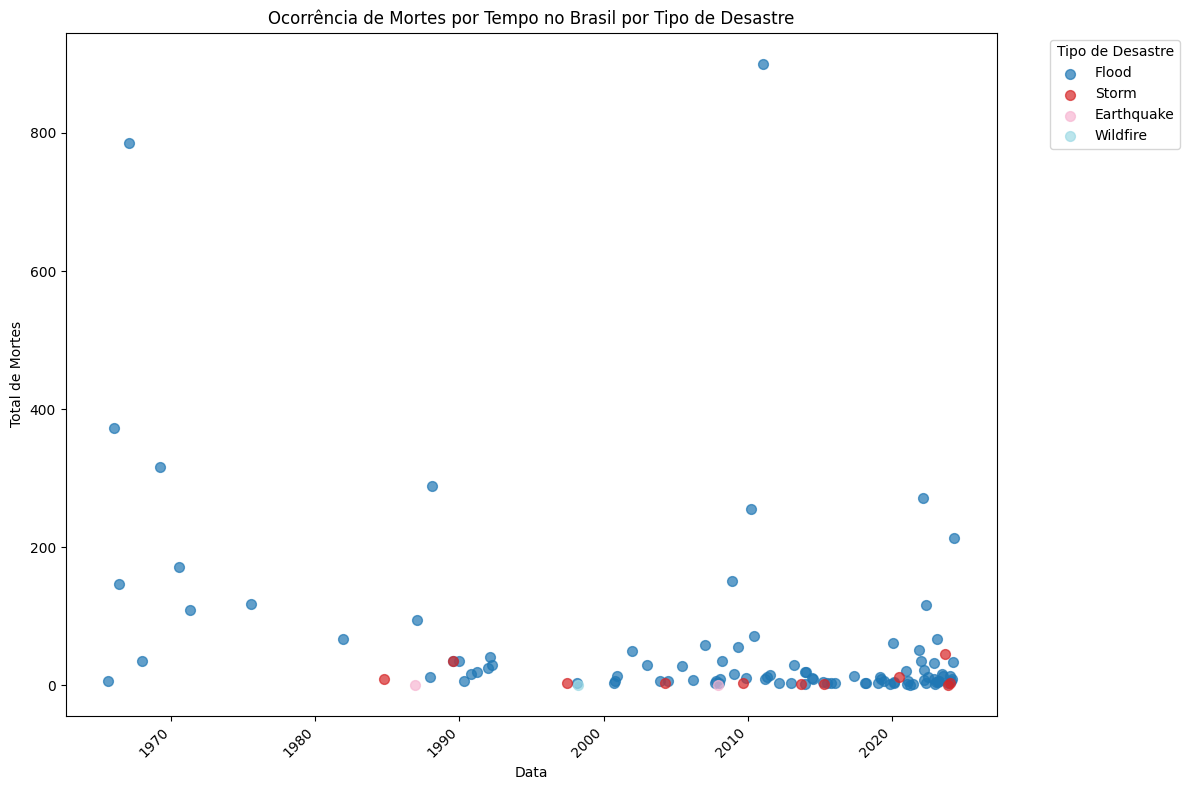

In [ ]:
# Filtrar os dados para o país 'Brazil'
brazil_data = new_df_cleaned[new_df_cleaned['Country'] == 'Brazil']

# Criar uma lista de cores para os tipos de desastre
disaster_types = brazil_data['Disaster Type'].unique()
colors = plt.cm.get_cmap('tab20', len(disaster_types))

# Mapeamento dos tipos de desastre para cores
color_map = {dtype: colors(i) for i, dtype in enumerate(disaster_types)}

# Criar o gráfico de dispersão
plt.figure(figsize=(12, 8))

# Plotar as bolinhas coloridas para diferentes tipos de desastres
for disaster_type, color in color_map.items():
    subset = brazil_data[brazil_data['Disaster Type'] == disaster_type]
    plt.scatter(
        subset['Date'],
        subset['Total Deaths'],
        color=color,
        label=disaster_type,
        s=50, # Tamanho das bolinhas
        alpha=0.7 # Transparência das bolinhas
    )

# Adicionar legendas
plt.legend(title='Tipo de Desastre', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('Ocorrência de Mortes por Tempo no Brasil por Tipo de Desastre')
plt.xlabel('Data')
plt.ylabel('Total de Mortes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<ipython-input-43-638f8876dd90>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  latin_america_data['Year'] = latin_america_data['Date'].dt.year


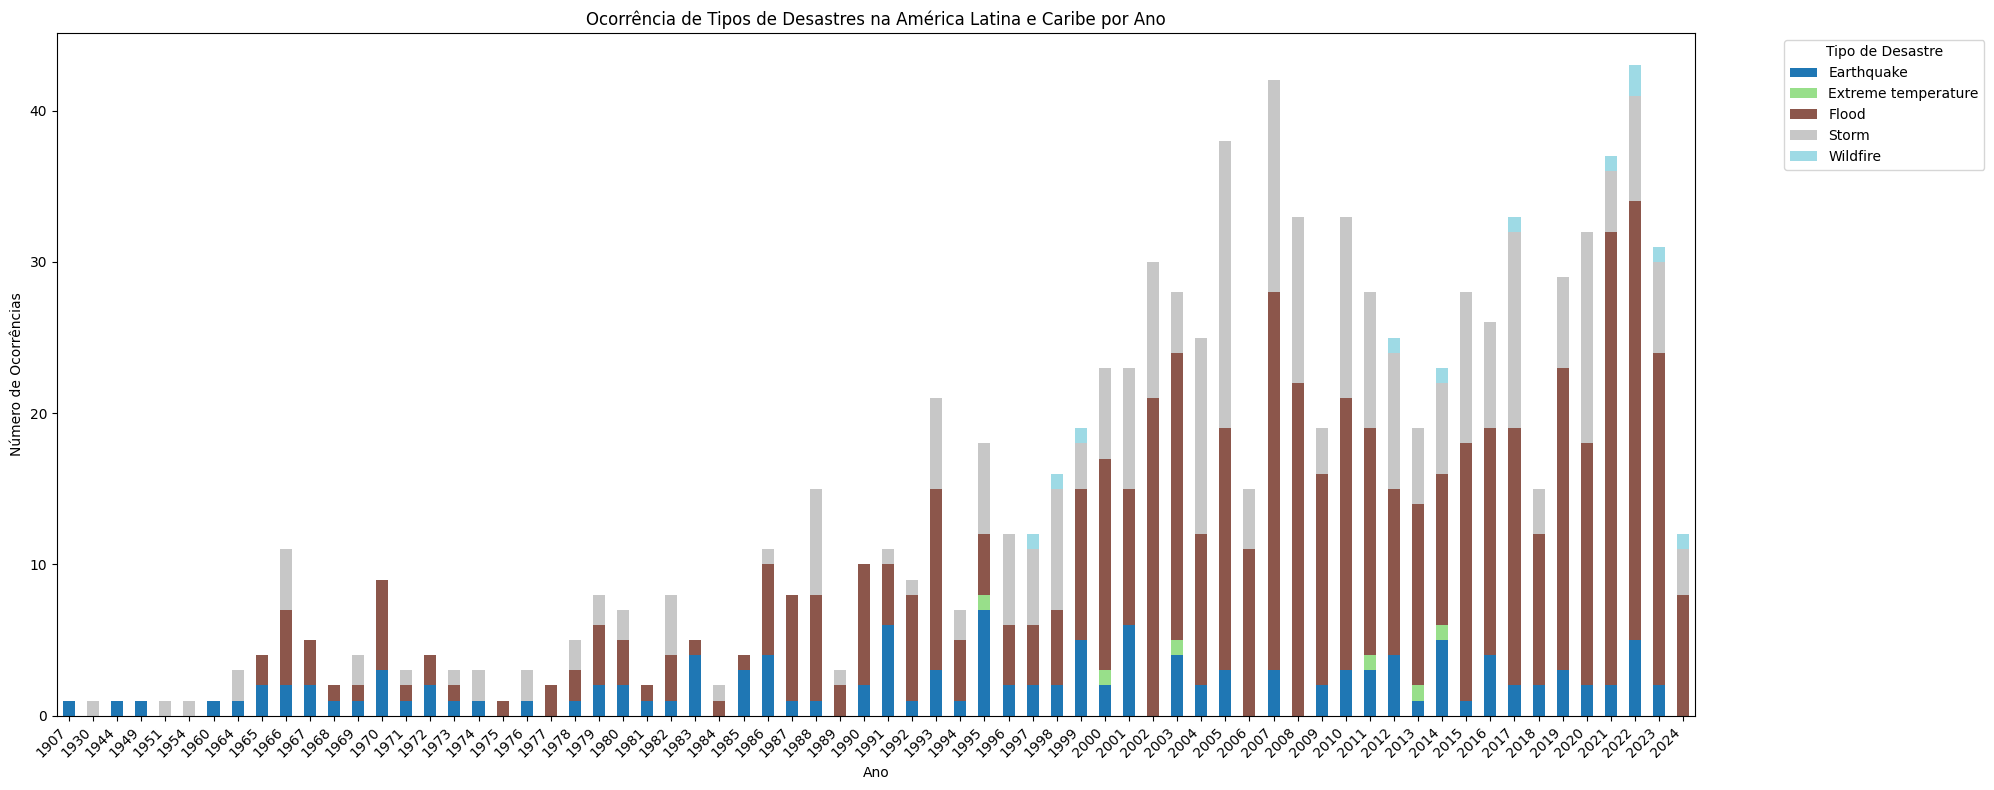

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Filtrar os dados para a subregião 'Latin America and the Caribbean'
latin_america_data = new_df_cleaned[new_df_cleaned['Subregion'] == 'Latin America and the Caribbean']

# Extrair o ano de 'Date'
latin_america_data['Year'] = latin_america_data['Date'].dt.year

# Agrupar os dados por tipo de desastre e ano
disaster_counts = latin_america_data.groupby(['Year', 'Disaster Type']).size().unstack(fill_value=0)

# Criar o gráfico de barras empilhadas
plt.figure(figsize=(20, 8))

# Plotar as barras empilhadas
disaster_counts.plot(kind='bar', stacked=True, colormap='tab20', ax=plt.gca())

plt.title('Ocorrência de Tipos de Desastres na América Latina e Caribe por Ano')
plt.xlabel('Ano')
plt.ylabel('Número de Ocorrências')
plt.legend(title='Tipo de Desastre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<ipython-input-44-4131604add34>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  latin_america_flood_data['Year'] = latin_america_flood_data['Date'].dt.year


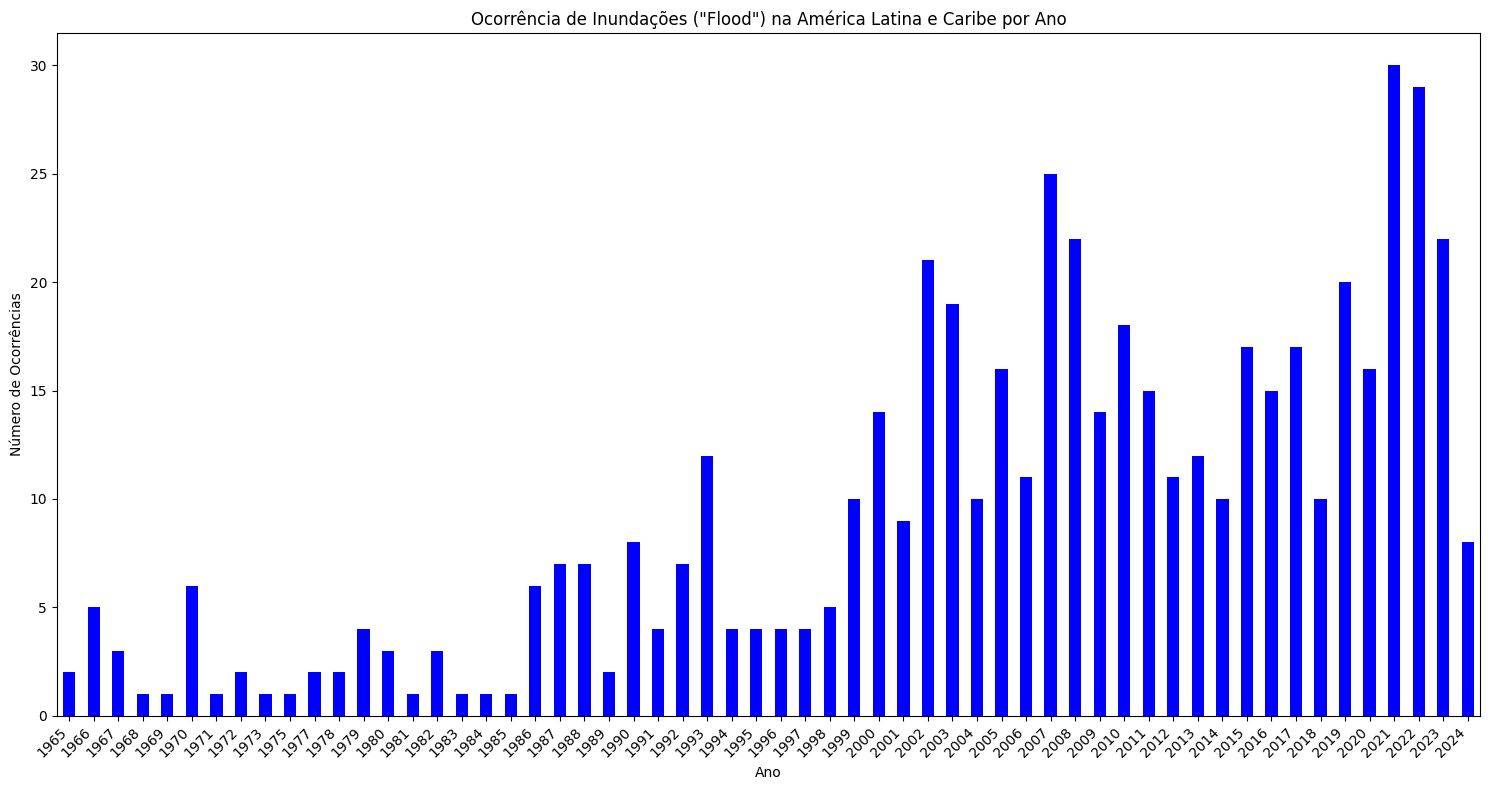

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Filtrar os dados para a subregião 'Latin America and the Caribbean' e tipo de desastre 'Flood'
latin_america_flood_data = new_df_cleaned[(new_df_cleaned['Subregion'] == 'Latin America and the Caribbean') &
                                          (new_df_cleaned['Disaster Type'] == 'Flood')]

# Extrair o ano de 'Date'
latin_america_flood_data['Year'] = latin_america_flood_data['Date'].dt.year

# Agrupar os dados por ano e contar o número de ocorrências de 'Flood'
flood_counts = latin_america_flood_data.groupby('Year').size()

# Criar o gráfico de barras
plt.figure(figsize=(15, 8))

# Plotar o gráfico de barras
flood_counts.plot(kind='bar', color='blue')

plt.title('Ocorrência de Inundações ("Flood") na América Latina e Caribe por Ano')
plt.xlabel('Ano')
plt.ylabel('Número de Ocorrências')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<ipython-input-45-785a0bce094d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flood_data['Year'] = flood_data['Date'].dt.year
<ipython-input-45-785a0bce094d>:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(grouped_data.columns))


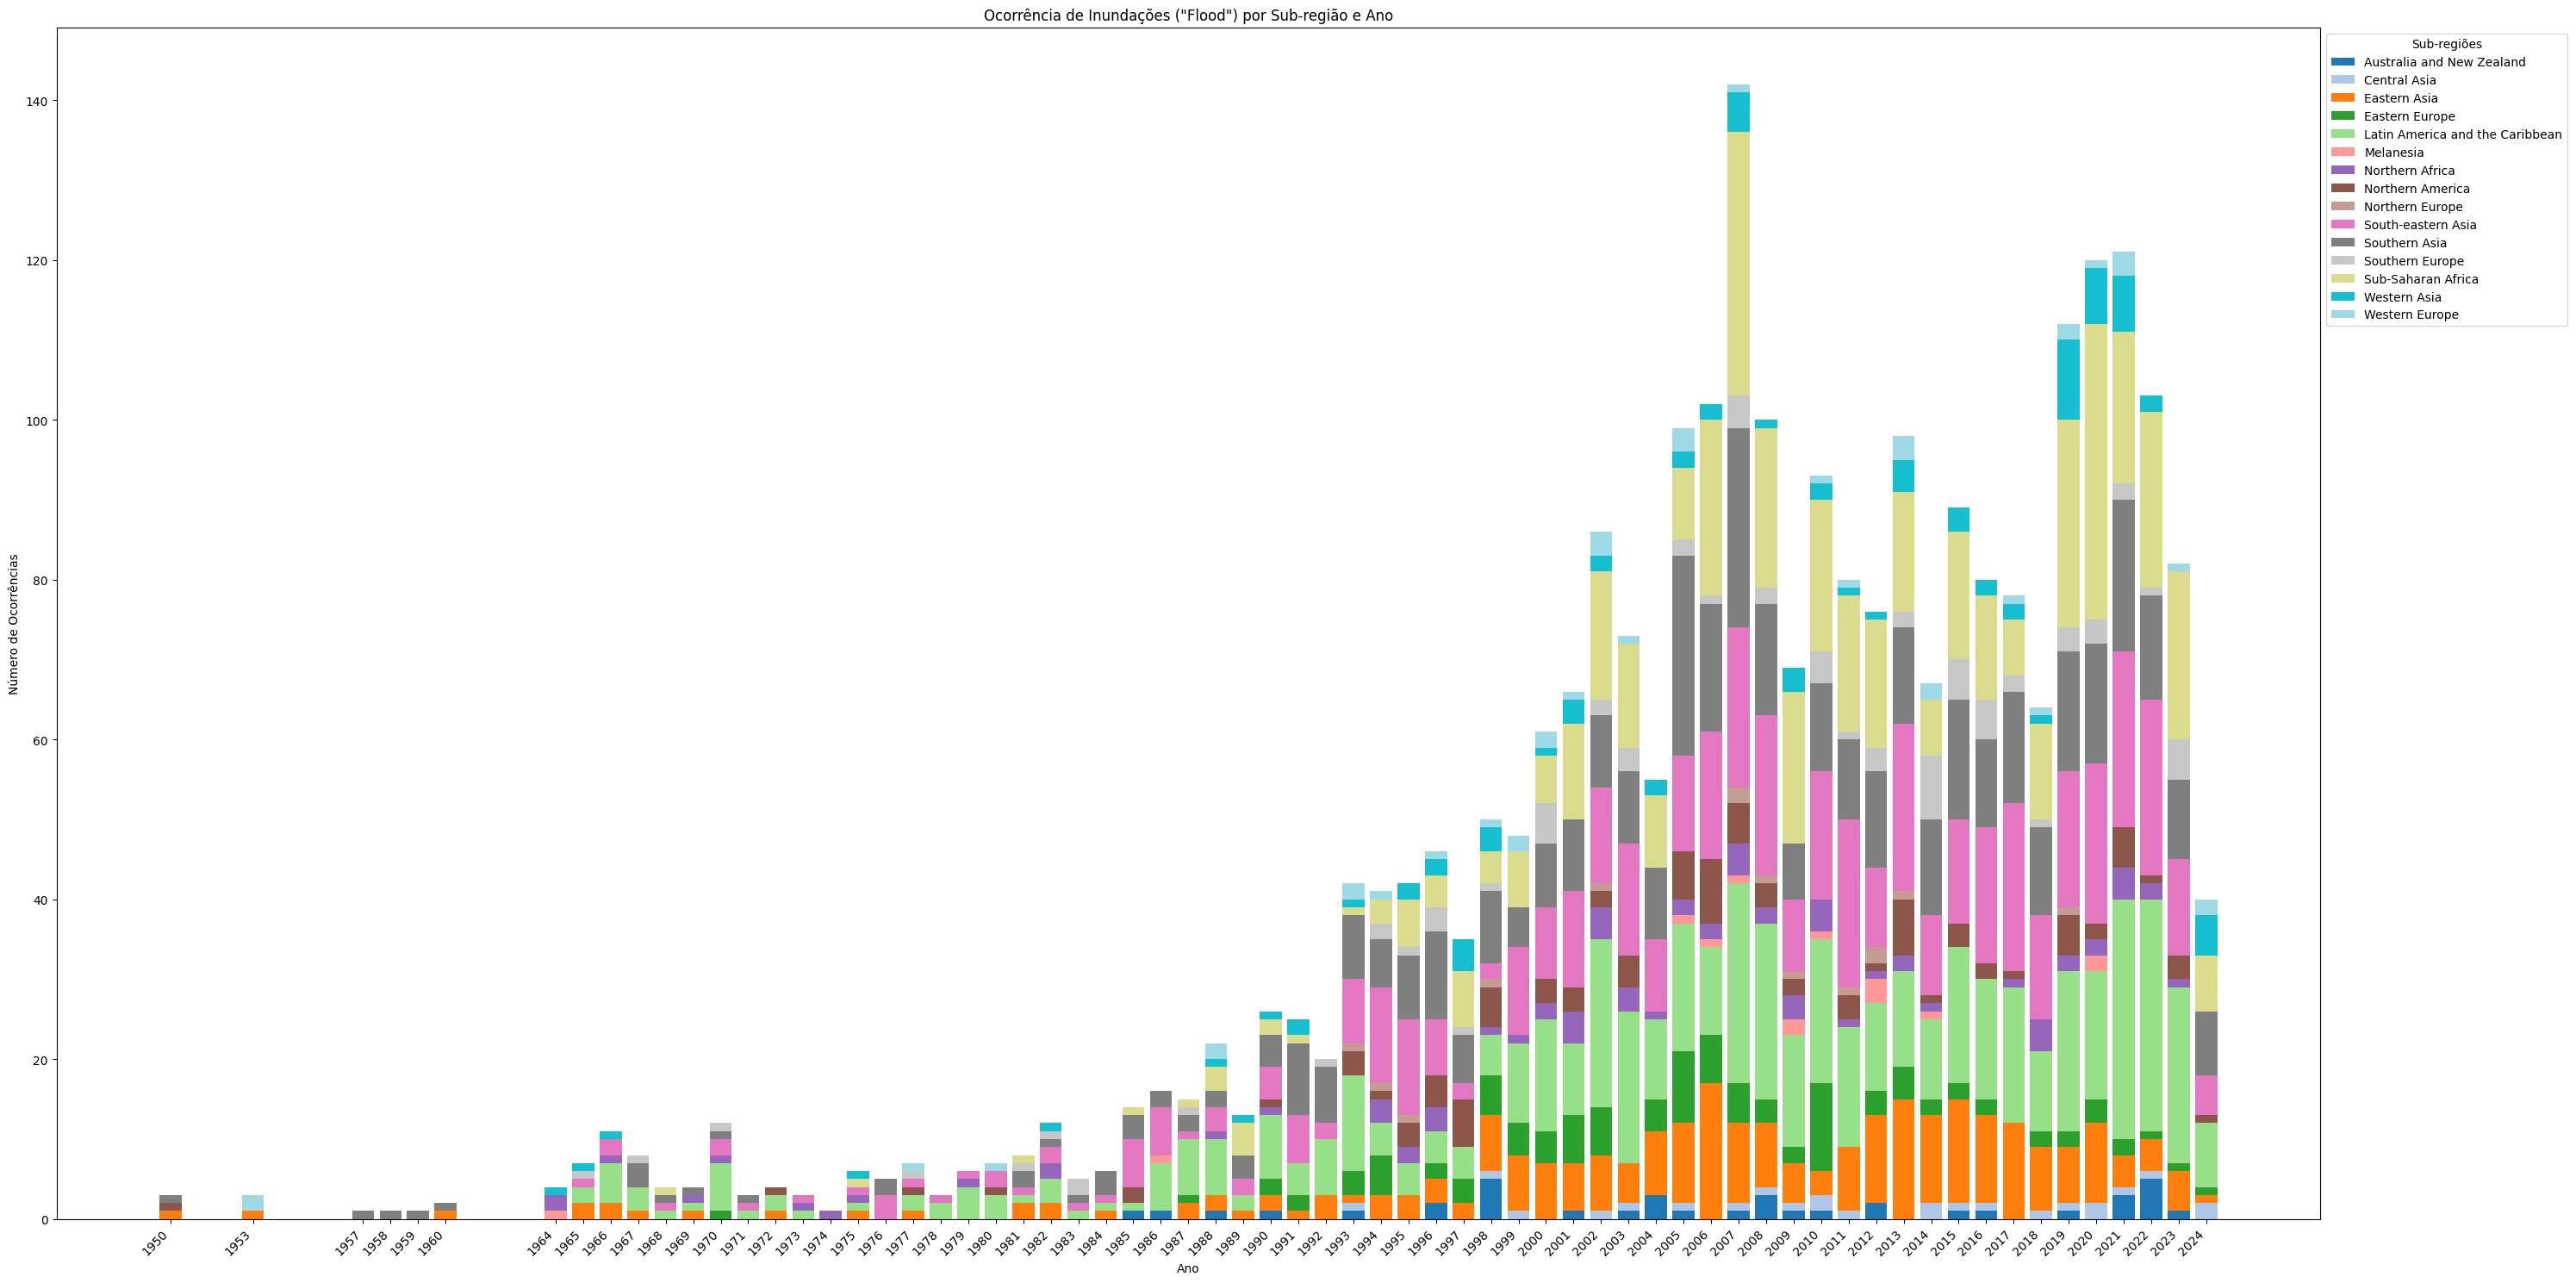

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Filtrar os dados para desastres do tipo 'Flood'
flood_data = new_df_cleaned[new_df_cleaned['Disaster Type'] == 'Flood']

# Extrair o ano de 'Date'
flood_data['Year'] = flood_data['Date'].dt.year

# Agrupar os dados por ano e sub-região e contar o número de ocorrências de 'Flood'
grouped_data = flood_data.groupby(['Year', 'Subregion']).size().unstack(fill_value=0)

# Configurar o tamanho do gráfico
plt.figure(figsize=(30, 15))

# Plotar as barras empilhadas
colors = plt.cm.get_cmap('tab20', len(grouped_data.columns))
bottoms = pd.Series([0] * len(grouped_data), index=grouped_data.index)

for subregion in grouped_data.columns:
    plt.bar(grouped_data.index, grouped_data[subregion], bottom=bottoms, color=colors(grouped_data.columns.get_loc(subregion)), label=subregion)
    bottoms += grouped_data[subregion]

# Ajustar o eixo X para intervalos regulares
plt.xticks(ticks=grouped_data.index, rotation=45, ha='right')

# Adicionar título e rótulos dos eixos
plt.title('Ocorrência de Inundações ("Flood") por Sub-região e Ano')
plt.xlabel('Ano')
plt.ylabel('Número de Ocorrências')

# Adicionar a legenda
plt.legend(title='Sub-regiões', bbox_to_anchor=(1, 1), loc='upper left')

# Ajustar o layout do gráfico
plt.tight_layout()

# Mostrar o gráfico
plt.show()


<ipython-input-46-24ff8d640ca5>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  latin_america_flood_data['Year'] = latin_america_flood_data['Date'].dt.year


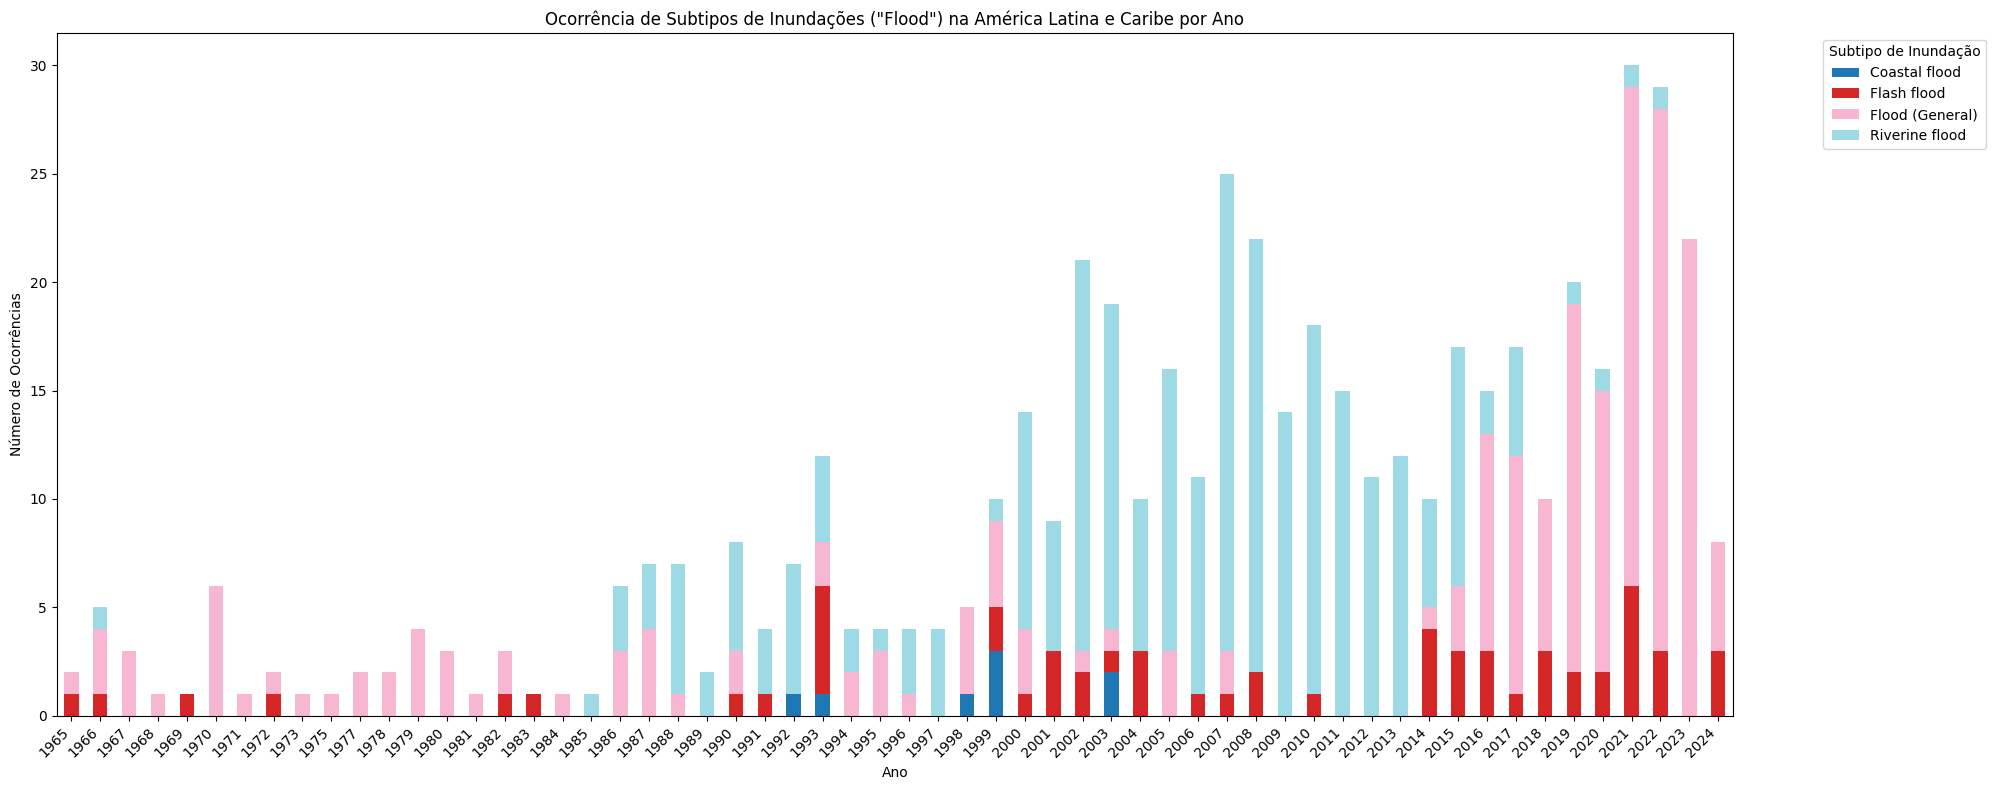

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Filtrar os dados para a subregião 'Latin America and the Caribbean' e tipo de desastre 'Flood'
latin_america_flood_data = new_df_cleaned[(new_df_cleaned['Subregion'] == 'Latin America and the Caribbean') &
                                          (new_df_cleaned['Disaster Type'] == 'Flood')]

# Extrair o ano de 'Date'
latin_america_flood_data['Year'] = latin_america_flood_data['Date'].dt.year

# Agrupar os dados por ano e subtipo de desastre, e contar o número de ocorrências
flood_subtype_counts = latin_america_flood_data.groupby(['Year', 'Disaster Subtype']).size().unstack(fill_value=0)

# Criar o gráfico de barras empilhadas
plt.figure(figsize=(20, 8))

# Plotar as barras empilhadas
flood_subtype_counts.plot(kind='bar', stacked=True, colormap='tab20', ax=plt.gca())

plt.title('Ocorrência de Subtipos de Inundações ("Flood") na América Latina e Caribe por Ano')
plt.xlabel('Ano')
plt.ylabel('Número de Ocorrências')
plt.legend(title='Subtipo de Inundação', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


<ipython-input-47-930e01cfcffa>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brazil_data_counts['Year'] = brazil_data_counts['Date'].dt.year


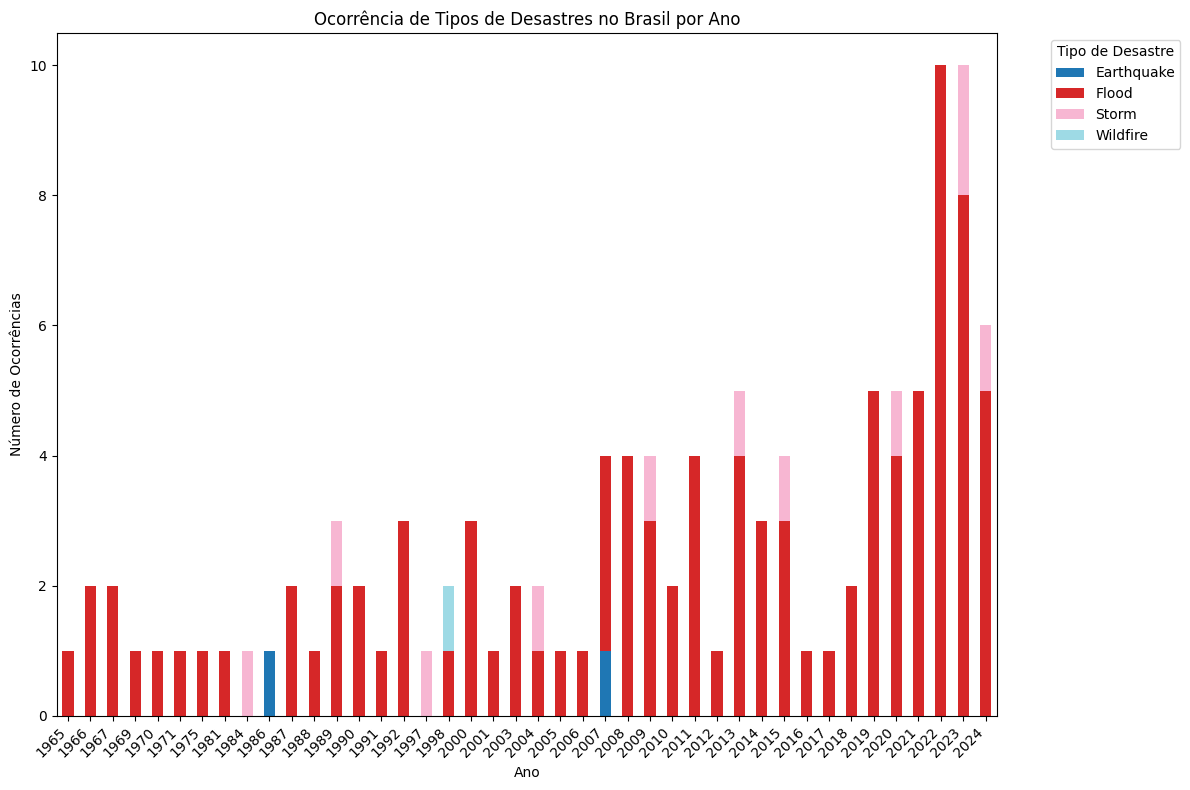

In [ ]:
# Filtrar os dados para o país 'Brazil'
brazil_data_counts = new_df_cleaned[new_df_cleaned['Country'] == 'Brazil']

# Agrupar os dados por tipo de desastre e ano
brazil_data_counts['Year'] = brazil_data_counts['Date'].dt.year
disaster_counts = brazil_data_counts.groupby(['Year', 'Disaster Type']).size().unstack(fill_value=0)

# Mostrar a contagem de desastres por ano e tipo
#print(disaster_counts)

# Criar o gráfico de barras empilhadas
plt.figure(figsize=(12, 8))

# Plotar as barras empilhadas
disaster_counts.plot(kind='bar', stacked=True, colormap='tab20', ax=plt.gca())

plt.title('Ocorrência de Tipos de Desastres no Brasil por Ano')
plt.xlabel('Ano')
plt.ylabel('Número de Ocorrências')
plt.legend(title='Tipo de Desastre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<ipython-input-48-504a4f87993b>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flood_data_2007['Month'] = flood_data_2007['Date'].dt.month
<ipython-input-48-504a4f87993b>:20: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(x='Month', y='Total Deaths', data=flood_data_2007, scale='width', inner='quartile')


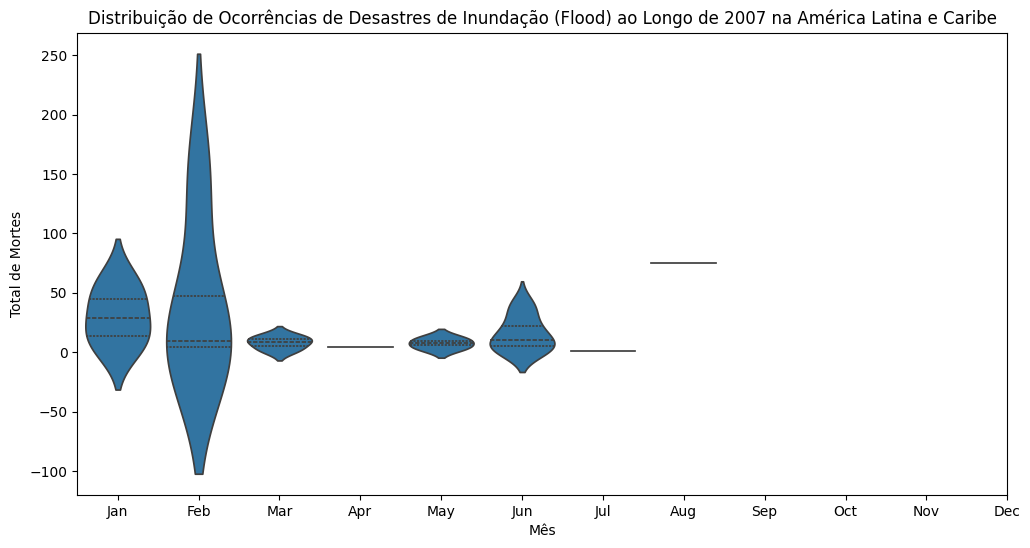

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar os dados para a subregião 'Latin America and the Caribbean'
latin_america_data = new_df_cleaned[new_df_cleaned['Subregion'] == 'Latin America and the Caribbean']

# Filtrar os dados para o tipo de desastre 'Flood'
flood_data = latin_america_data[latin_america_data['Disaster Type'] == 'Flood']

# Filtrar os dados para o ano 2007
flood_data_2007 = flood_data[flood_data['Date'].dt.year == 2007]

# Extrair o mês da coluna 'Date'
flood_data_2007['Month'] = flood_data_2007['Date'].dt.month

# Plotar o gráfico de violino
plt.figure(figsize=(12, 6))
sns.violinplot(x='Month', y='Total Deaths', data=flood_data_2007, scale='width', inner='quartile')
plt.title('Distribuição de Ocorrências de Desastres de Inundação (Flood) ao Longo de 2007 na América Latina e Caribe')
plt.xlabel('Mês')
plt.ylabel('Total de Mortes')
plt.xticks(ticks=range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

In [ ]:
# Gráfico Heatmap para melhor visualização dos dados.
#Analisando a correlação de atributos quantitativos com a variável alvo da pesquisa: número de mortes.

colunas_numericas = new_df_cleaned.select_dtypes(include=['int64']).columns
dados_numericos = data[colunas_numericas]
matriz_corr = dados_numericos.corr()

print(matriz_corr)

                Total Deaths  No. Affected  Total Affected
Total Deaths        1.000000      0.139362        0.137633
No. Affected        0.139362      1.000000        0.999691
Total Affected      0.137633      0.999691        1.000000


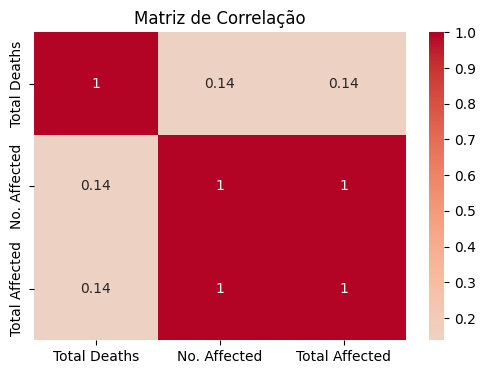

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gráfico Heatmap para melhor visualização dos dados.

plt.figure(figsize=(6, 4))
sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlação')
plt.show()

# Formatação dos Dados para o Algoritmo
Visto que não há mais linhas com valores nulos, os dados serão agora formatados para serem posteriormente separados em treino e teste para o algoritmo Random Forest. Os dados do tipo "Objeto" serão tratados com o OneHotEncoder.

In [ ]:
# Selecionar colunas numéricas inteiras para normalização

from sklearn.preprocessing import MinMaxScaler

# Adicione todas as colunas inteiras aqui, por exemplo:
colunas_inteiro = ['No. Affected', 'Total Affected']

# Inicialize o MinMaxScaler
escalonador = MinMaxScaler(feature_range=(0, 1))

# Aplicar a normalização Min-Max
new_df_cleaned[colunas_inteiro] = escalonador.fit_transform(new_df_cleaned[colunas_inteiro])

# Verificar o resultado
#print(new_df_cleaned)
print(new_df_cleaned[colunas_inteiro])

       No. Affected  Total Affected
18     5.610179e-04    5.235194e-04
20     7.836323e-05    7.337649e-05
26     2.690359e-04    2.510535e-04
41     7.242153e-06    6.758086e-06
50     7.713005e-07    7.197466e-07
...             ...             ...
26605  2.688341e-05    2.518276e-05
26607  1.771300e-06    1.657091e-06
26609  1.069058e-05    9.976023e-06
26614  6.704036e-06    6.264306e-06
26618  4.033632e-05    3.798756e-05

[5032 rows x 2 columns]


<ipython-input-51-68f1d5c12767>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df_cleaned[colunas_inteiro] = escalonador.fit_transform(new_df_cleaned[colunas_inteiro])


In [ ]:
# Há uma alta quantidade de valores únicos para Location, logo essa coluna será removida para não gerar um número alto demais de colunas. Ao contrário de Disaster Group, que só possui 1 valor 'Natural'
new_df_cleaned = new_df_cleaned.drop(columns=['Location', 'Disaster Group', 'Country'])


In [ ]:
# Convertendo os valores categóricos (tipo "objeto") para um vetor numérico One-Hot (representação binária).

# Selecionar todas as colunas categóricas (do tipo object)
colunas_categoricas = new_df_cleaned.select_dtypes(include=['object']).columns

# Verificar o número de categorias únicas em cada coluna categórica
for col in colunas_categoricas:
    num_unique = new_df_cleaned[col].nunique()
    print(f"{col}: {num_unique} unique values")

#print(colunas_categoricas)

Historic: 2 unique values
Disaster Subgroup: 4 unique values
Disaster Type: 6 unique values
Disaster Subtype: 24 unique values
Subregion: 17 unique values
Region: 5 unique values
OFDA/BHA Response: 2 unique values
Appeal: 2 unique values
Declaration: 2 unique values
Magnitude Scale: 4 unique values


In [ ]:
# Inicializando o OneHotEncoder

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False) # sparse = False retorna uma matriz densa

# Ajusta e transforma os dados categóricos
ajusta_dados = encoder.fit_transform(new_df_cleaned[colunas_categoricas])

# Cria um DataFrame com os dados transformados
transforma_dados = pd.DataFrame(ajusta_dados, columns=encoder.get_feature_names_out(colunas_categoricas), index=new_df_cleaned.index)

# Concatena o DataFrame original (sem as colunas categóricas) com o DataFrame codificado
novo_df = pd.concat([new_df_cleaned.drop(columns=colunas_categoricas), transforma_dados], axis=1)


print(novo_df.head())

    Total Deaths  No. Affected  Total Affected       Date  Historic_No  \
18          4562  5.610179e-04    5.235194e-04 1902-12-16          0.0   
20            86  7.836323e-05    7.337649e-05 1902-02-13          0.0   
26          3560  2.690359e-04    2.510535e-04 1903-04-29          0.0   
41             4  7.242153e-06    6.758086e-06 1904-08-11          0.0   
50            11  7.713005e-07    7.197466e-07 1905-06-02          0.0   

    Historic_Yes  Disaster Subgroup_Climatological  \
18           1.0                               0.0   
20           1.0                               0.0   
26           1.0                               0.0   
41           1.0                               0.0   
50           1.0                               0.0   

    Disaster Subgroup_Geophysical  Disaster Subgroup_Hydrological  \
18                            1.0                             0.0   
20                            1.0                             0.0   
26                     

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
# Extraímos o ano da coluna 'Date'
novo_df['Year'] = novo_df['Date'].dt.year

# Normalizar a coluna 'Year'
scaler = MinMaxScaler()
cols_to_normalize = ['Year']
novo_df[cols_to_normalize] = scaler.fit_transform(novo_df[cols_to_normalize])

# Verificar a normalização
#print(flood_data[['Year', 'Month', 'Day']].head())
print(novo_df.head())

    Total Deaths  No. Affected  Total Affected       Date  Historic_No  \
18          4562  5.610179e-04    5.235194e-04 1902-12-16          0.0   
20            86  7.836323e-05    7.337649e-05 1902-02-13          0.0   
26          3560  2.690359e-04    2.510535e-04 1903-04-29          0.0   
41             4  7.242153e-06    6.758086e-06 1904-08-11          0.0   
50            11  7.713005e-07    7.197466e-07 1905-06-02          0.0   

    Historic_Yes  Disaster Subgroup_Climatological  \
18           1.0                               0.0   
20           1.0                               0.0   
26           1.0                               0.0   
41           1.0                               0.0   
50           1.0                               0.0   

    Disaster Subgroup_Geophysical  Disaster Subgroup_Hydrological  \
18                            1.0                             0.0   
20                            1.0                             0.0   
26                     

# Separação dos dados em Treino (70%) e Teste (30%) e definição da variável alvo.
A variável alvo será o número de mortes (Total Deaths) e os dados foram separados em treino (70%) e teste (30%) como solicitado.

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split


# Identificar as colunas resultantes do OneHotEncoder para sub-regiões
subregion_columns = [col for col in novo_df.columns if col.startswith('Subregion_')]

# Filtrar os dados para as sub-regiões 'Southern Asia' e 'Eastern Asia'
subregions_filtered = novo_df[(novo_df['Subregion_Southern Asia'] == 1) | (novo_df['Subregion_Eastern Asia'] == 1)]

# Ordenar os dados pela coluna 'Date'
subregions_filtered = subregions_filtered.sort_values('Date')

# 3. Calcular o índice de corte para 70% de treino e 30% de teste
cutoff_index = int(len(subregions_filtered) * 0.7)

# 4. Separar os dados em treino e teste com base no índice de corte
train_data = subregions_filtered.iloc[:cutoff_index]
test_data = subregions_filtered.iloc[cutoff_index:]

In [ ]:
# Separar variáveis preditoras (X) e variável alvo (y)
X_train = train_data.drop(columns=['Total Deaths', 'Date'])
y_train = train_data['Total Deaths']
X_test = test_data.drop(columns=['Total Deaths', 'Date'])
y_test = test_data['Total Deaths']


# Aplicação do modelo Random Forest

In [ ]:
# Inicializando o Random Forest Regressor
rf_modelo = RandomForestRegressor(n_estimators=200, random_state=1)

# Treinando o modelo
rf_modelo.fit(X_train, y_train)

# Fazendo previsões
rf_y_pred = rf_modelo.predict(X_test)

# Avaliando o modelo
print(f"RF Mean Squared Error: {mean_squared_error(y_test, rf_y_pred):.4f}")
print(f"RF R^2 Score: {r2_score(y_test, rf_y_pred):.4f}")

RF Mean Squared Error: 867723.3444
RF R^2 Score: -2.4820


#Aplicando RandomizedSearchCV no algoritmo de Random Forest Regressor

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Definindo o espaço de parâmetros para RandomizedSearchCV
param_distributions = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'random_state': [1]  # Semente para reprodutibilidade
}

# Inicializando o Random Forest Regressor
rf_SCV_modelo = RandomForestRegressor()

# Configurando o RandomizedSearchCV
random_search_rf = RandomizedSearchCV(
    estimator=rf_SCV_modelo,
    param_distributions=param_distributions,
    n_iter=50,  # Número de combinações de parâmetros a serem testadas
    scoring='neg_mean_squared_error',  # Métrica a ser otimizada
    cv=3,  # Número de folds na validação cruzada
    verbose=1,  # Verbosidade durante o ajuste
    random_state=1,
    n_jobs=-1  # Utilizar todos os núcleos disponíveis
)

# Ajustando o modelo com RandomizedSearchCV
random_search_rf.fit(X_train, y_train)

# Melhor combinação de parâmetros encontrada
print("Melhores Parâmetros Encontrados:")
print(random_search_rf.best_params_)

# Melhor modelo encontrado
best_rf_model = random_search_rf.best_estimator_

# Fazendo previsões com o melhor modelo
rf_SCV_y_pred = best_rf_model.predict(X_test)

# Avaliando o modelo
mse = mean_squared_error(y_test, rf_SCV_y_pred)
r2 = r2_score(y_test, rf_SCV_y_pred)
print(f"RF Mean Squared Error: {mse:.4f}")
print(f"RF R^2 Score: {r2:.4f}")

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Melhores Parâmetros Encontrados:
{'random_state': 1, 'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 40, 'bootstrap': False}
RF Mean Squared Error: 686056.5865
RF R^2 Score: -1.7530


# Aplicação do Modelo XGBoost

In [ ]:
pip install xgboost

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

# Definindo os parâmetros do modelo
params = {
    'objective': 'reg:squarederror',  # Objetivo de regressão
    'max_depth': 6,  # Profundidade máxima da árvore
    'eta': 0.1,  # Taxa de aprendizado
    'subsample': 0.8,  # Subamostragem dos dados de treino para cada árvore
    'colsample_bytree': 0.8,  # Subamostragem das features para cada árvore
    'n_estimators': 100,  # Número de árvores a serem construídas
    'seed': 1  # Semente para reprodutibilidade
}

# Inicializando o XGBRegressor com os parâmetros
xgb_model = xgb.XGBRegressor(
    objective=params['objective'],
    max_depth=params['max_depth'],
    learning_rate=params['eta'],
    subsample=params['subsample'],
    colsample_bytree=params['colsample_bytree'],
    n_estimators=params['n_estimators'],
    seed=params['seed']
)

# Treinando o modelo
xgb_model.fit(X_train, y_train)

# Fazendo previsões
xg_y_pred = xgb_model.predict(X_test)

# Avaliando o modelo
mse = mean_squared_error(y_test, xg_y_pred)
r2 = r2_score(y_test, xg_y_pred)
print(f"XG Mean Squared Error: {mse:.4f}")
print(f"XG R^2 Score: {r2:.4f}")

XG Mean Squared Error: 3677921.4440
XG R^2 Score: -13.7589


# Aplicação do Modelo AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

# Definindo o modelo base
base_model = DecisionTreeRegressor(max_depth=3)

# Definindo o modelo AdaBoost
ada_model = AdaBoostRegressor(base_model, n_estimators=50, random_state=1)

# Treinando o modelo
ada_model.fit(X_train, y_train)

# Fazendo previsões
ada_y_pred = ada_model.predict(X_test)

# Avaliando o modelo
print(f"ADA Mean Squared Error: {mean_squared_error(y_test, ada_y_pred):.4f}")
print(f"ADA R^2 Score: {r2_score(y_test, ada_y_pred):.4f}")

ADA Mean Squared Error: 1393368.3037
ADA R^2 Score: -4.5913


#Aplicação do Algoritmo de Stacking


In [ ]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor

base_models = [
    ('rf', RandomForestRegressor(n_estimators=50, random_state=1)),
    ('gb', GradientBoostingRegressor(n_estimators=50, random_state=1))
]

# Definindo o meta-modelo
meta_model = LinearRegression()

# Criando o modelo Stacking
stacking_model = StackingRegressor(estimators=base_models, final_estimator=meta_model, cv=5)

# Treinando o modelo
stacking_model.fit(X_train, y_train)

# Fazendo previsões
stacking_y_pred = stacking_model.predict(X_test)

# Avaliando o modelo
print(f"Stacking Mean Squared Error: {mean_squared_error(y_test, stacking_y_pred):.4f}")
print(f"Stacking R^2 Score: {r2_score(y_test, stacking_y_pred):.4f}")

Stacking Mean Squared Error: 924061.8792
Stacking R^2 Score: -2.7081
